<a href="https://colab.research.google.com/github/andriykhl/machine_learning/blob/master/test_ground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Table of Contents:

- [Face Recognition](#intro)
- [Plotly](#plotly)

In [ ]:
import google 

google.colab.files.__file__.capitalize()
#dir()
#dir(google.api)

'/usr/local/lib/python3.6/dist-packages/google/colab/files.py'

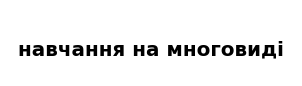

(288, 72) ***
(288, 72)


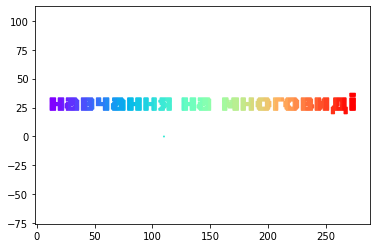

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns

def make_hello():
  # Make a plot with "HELLO" text; save as PNG
  fig, ax = plt.subplots(figsize=(4, 1))
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
  ax.axis('off')
  ax.text(0.5, 0.4, '–Ω–∞–≤—á–∞–Ω–Ω—è –Ω–∞ –º–Ω–æ–≥–æ–≤–∏–¥—ñ', va='center', ha='center', weight='bold', size=20)
  fig.savefig('hello.png')
  #plt.close(fig)
  plt.draw()
  plt.show()
  # Open this PNG and draw random points from it
  from matplotlib.image import imread
  data = imread('hello.png')[::-1, :, 0].T
  data[110,0] = 0
  plt.imshow(data)
  plt.draw()
  plt.close()
  pts = []
  print(data.shape, '***')
  for x in range(data.shape[0]):
    for y in range(data.shape[1]):
      if data[x,y] < 1.0:
        pts.append([x, y])
  X = np.array(pts, dtype=float)
  print(data.shape)
  X_new = X

  #X_new = X_new / X_new.shape[0] * 10
  X_new[:, 1] *= 1
  return X_new

X = make_hello()
colorize = dict(c=X[:, 0]*5, cmap=plt.cm.get_cmap('rainbow', 50))
plt.scatter(X[:, 0], X[:, 1], s=1, **colorize)
#plt.xlim(-100,500)
#plt.ylim(0.22,0.25)
plt.axis('equal');

#Get Leetcode Data

In [2]:
!pip install --upgrade gspread
!apt update --fix-missing
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

from google.colab import output
output.clear()

In [ ]:
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

from selenium.webdriver.common.by import By
wd = webdriver.Chrome('chromedriver',options=options)

In [ ]:
#!pip install kora -q
#from kora.selenium import wd

In [ ]:
def get_likes_views_comments(link):
  like = '[EXCEPTION]'
  view = '[EXCEPTION]'
  comm = '[EXCEPTION]'

  wd.get(link)
  from selenium.webdriver.support.ui import WebDriverWait
  from selenium.webdriver.support import expected_conditions as EC
  try:
    element = WebDriverWait(wd, 20).until(
        EC.visibility_of_element_located((By.XPATH, '//*[@id="discuss-container"]/div/div/div[2]/div[1]/div[1]/div/div[2]/span'))
    )
    #wd.implicitly_wait(20)

    import re
    likes = wd.find_element_by_xpath('//*[@id="discuss-container"]/div/div/div[2]/div[1]/div[1]/div/div[2]/span')
    like = likes.get_attribute("innerHTML")
    like = like.strip()
    if 'K' in like:
      like = int(1000.0 * float(re.sub('K', '', like)))
    views = wd.find_element_by_xpath('//*[@id="discuss-container"]/div/div/div[2]/div[1]/div[2]/div[1]/div/div/div[2]/p[2]')
    view = views.get_attribute("innerHTML")
    view = re.sub('VIEWS', '', view)
    view = view.strip()
    if 'K' in view:
      view = int(1000.0 * float(re.sub('K', '', view)))
    coms = wd.find_element_by_xpath('//*[@id="discuss-container"]/div/div/div[2]/div[2]/div[1]/div[1]/span')
    comments = coms.get_attribute("innerHTML")
    comments = re.sub('<.*>', '', comments)
    comments = re.sub('Comments:', '', comments)
    comm = comments.strip()
    if 'K' in comm:
      comm = int(1000.0 * float(re.sub('K', '', comm)))

  except:
    print('EXCEPTION')
    return '[EXCEPTION]', '[EXCEPTION]', '[EXCEPTION]'

  return like, view, comm


from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

workbook = gc.open('Test_Spreadsheet')
worksheet = workbook.get_worksheet(4)
links = worksheet.get_all_values()

links_easy   = [l[3] for l in links[1:]]
links_medium = [l[4] for l in links[1:]]

worksheet_easy = workbook.get_worksheet(0)
worksheet_medium = workbook.get_worksheet(1)

def update_col(links, worksheet):
  views    = worksheet.range('G2:G' + str(len(links)+1))
  likes    = worksheet.range('H2:H' + str(len(links)+1))
  comments = worksheet.range('I2:I' + str(len(links)+1))

  index = 0
  for lnk,v,l,c in zip(links, views, likes, comments):
    index += 1
    if not lnk:
      continue
    print(index, '/', len(links))

    import re
    old_views    = re.sub('\(.*\)', '', str(v.value))
    if 'K' in old_views: 
      old_views = int(1000.0 * float(re.sub('K', '', old_views)))
    if not old_views:
      old_views = 0
    old_likes    = re.sub('\(.*\)', '', str(l.value))
    old_likes    = re.sub('üü¢', '', old_likes)
    old_likes    = re.sub('üîª', '', old_likes)
    if 'K' in old_likes: 
      old_likes = int(1000.0 * float(re.sub('K', '', old_likes)))
    if not old_likes:
      old_likes = 0
    old_comments = re.sub('\(.*\)', '', str(c.value))
    if 'K' in old_comments: 
      old_comments = int(1000.0 * float(re.sub('K', '', old_comments)))
    if not old_comments:
      old_comments = 0

    new_likes, new_views, new_comments = get_likes_views_comments(lnk)

    if new_likes != '[EXCEPTION]':
      delta = int(new_likes) - int(old_likes)
      l.value = str(new_likes) + ' (' + str(delta) + ')'
      if delta > 0:
        l.value += ' üü¢'
      if delta < 0:
        l.value += ' üîª'
    if new_views != '[EXCEPTION]':
      v.value = str(new_views) + ' (' + str(int(new_views) - int(old_views)) + ')'
    if new_comments != '[EXCEPTION]':
      c.value = str(new_comments) + ' (' + str(int(new_comments) - int(old_comments)) + ')'

    print(v.value, l.value, c.value, lnk)
  worksheet.update_cells(views)
  worksheet.update_cells(likes)
  worksheet.update_cells(comments)

update_col(links_easy, worksheet_easy)
update_col(links_medium, worksheet_medium)

#Intro research

In [ ]:
#@title Manifold learning
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns

def make_hello():
  # Make a plot with "HELLO" text; save as PNG
  fig, ax = plt.subplots(figsize=(4, 1))
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
  ax.axis('off')
  ax.text(0.5, 0.4, '  –Ω–∞–≤—á–∞–Ω–Ω—è –Ω–∞ –º–Ω–æ–≥–æ–≤–∏–¥—ñ  ', va='center', ha='center', weight='bold', size=20)
  fig.savefig('hello.png')
  plt.close(fig)
  # Open this PNG and draw random points from it
  from matplotlib.image import imread
  data = imread('hello.png')[::-1, :, 0].T
  x = range(data.shape[0])
  y = range(data.shape[1])
  xv, yv = np.meshgrid(x, y, sparse=False, indexing='ij')
  X = np.vstack([xv.flatten(), yv.flatten()]).T #rng.rand(4 * N, 2)
  X_new = np.array([x for x in X if data[x[0], x[1]] < 1])
  X_new = X_new / X_new.shape[0]
  X_new[:, 1] *= 0.01
  return X_new

X = make_hello()
colorize = dict(c=X[:, 0]*50, cmap=plt.cm.get_cmap('rainbow', 50))
colors = ['rgb(' + np.array2string(c[:-1], formatter={'float_kind':lambda x:  "%.0f" % (x * 255)}, separator=',')[1:-1] + ')' for c in colorize['cmap'](0.255*colorize['c'])]



def mobius(X, coef=1.0, delta=0.5):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi - delta)
  b_y = 0.5 * (np.max(X[:,1]) + np.min(X[:,1]))
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y * coef] for x in X]
  mobius = np.array([[(1.0 + p[1] * np.cos(p[0]/2)) * np.cos(p[0]), 
                      (1.0 + p[1] * np.cos(p[0]/2)) * np.sin(p[0]), 
                      p[1] * np.sin(p[0]/2)] for p in params])
  return mobius



import json
from IPython.display import display, clear_output
from scipy.spatial import Delaunay

def invoke(manifold, method):
  man = mobius(X, 0.2)

  x_ = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), num=100)
  y_ = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), num=100)
  xx, yy = np.meshgrid(x_, y_)
  x_vec = np.transpose(np.vstack([xx.ravel(), yy.ravel()]))
  Y = mobius(x_vec, delta=0.0) #[:,2].reshape((x_.shape[0],y_.shape[0]))

  tri = Delaunay(x_vec, )
  simplices = tri.simplices
  I, J, K = ([triplet[c] for triplet in tri.simplices] for c in range(3))
  #print(Y[:,0].shape, Y[:,1].shape, Y[:,2].shape)
  return IPython.display.JSON({'g_x': Y[:,0].tolist(), 'g_y': Y[:,1].tolist(), 'g_z': Y[:,2].tolist(),
                               's_x': man[:, 0].tolist(), 's_y': man[:, 1].tolist(), 's_z': man[:, 2].tolist(), 's_c': colors,
                               'simplices': [I, J, K]})


import IPython
from google.colab import output

main_str = '''
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script> 
  <script type="application/javascript">
  
    var params = null;

   function plot_3d(g_x, g_y, g_z, simp)
   {
     cell_for_plot = document.getElementById('for_plotly_plot');
     //Plotly.deleteTraces(cell_for_plot, [0, 1]);
     var data = [{
           x: g_x,
           y: g_y,
           z: g_z,
           i: simp[0],
           j: simp[1],
           k: simp[2],
           type: 'mesh3d',
           opacity: 0.4,
           showscale: false,
           colorscale: "Viridis"
        }];
     var layout = {
          title: {text:'–õ–ï–ö–¶–Ü–Ø 16',
                  font: {size: 36}
                 },
          autosize: false,
          width: 1200,
          height: 800,
          showlegend: false,
          scene: {
            xaxis: {//showgrid: false,
                    //zeroline: false,
                    visible:  false,
            },
            yaxis: {//showgrid: false,
                    //zeroline: false,
                    visible:  false,
            },
            zaxis: {//showgrid: false,
                    //zeroline: false,
                    visible:  false,
            },
            camera: {
              up: {x: 0, y: 1, z: 0},
              center: {x: 0, y: 0, z: 0},
              eye: {x: 0.0, y: -1.0, z: 1.4}
            }
          }
        };
     //debug_txt = 'before plot';
     Plotly.newPlot(cell_for_plot, data, layout);
     //debug_txt = 'go';
   }

   function plot_scatter(s_x, s_y, s_z, colors)
   {
     cell_for_plot = document.getElementById('for_plotly_plot');
     var data = [{
           x: s_x,
           y: s_y,
           z: s_z,
           type: 'scatter3d',
           mode: 'markers',
           marker: {
             size: 2,
             color: colors
           }
        }];
    Plotly.plot(cell_for_plot, data, {});
   }


    var cur_depth = 100;

    async function calculate() {
      var ker_name = '';
      var metric_name = '';
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [ker_name, metric_name], {});
      params = result.data['application/json'];
      
      plot_3d(params.g_x, params.g_y, params.g_z, params.simplices);
      plot_scatter(params.s_x, params.s_y, params.s_z, params.s_c);
      
    }

 </script>

<div id="everything" style="height:900px;">
<div id="for_plotly_plot" style="position:absolute; top:0px; left:0px; height:600px; width:600px;">
</div>
</div>
<script>
calculate();
</script>

'''

display(IPython.display.HTML(main_str))
output.register_callback('notebook.InvSVM', invoke)

In [ ]:
from sklearn.neighbors import KernelDensity
# instantiate and fit the KDE model
kde = KernelDensity()

def fit_distribution(X, bandwidth, ker_name, metric_name):
  params = {'bandwidth': bandwidth, 'kernel': ker_name, 'metric': metric_name}
  kde.set_params(**params)
  kde.fit(X)

def evaluate_distribution(X):
  X = np.array(X)
  logprob = kde.score_samples(X)
  y = X[:,1] - 0.25 * np.sin(10.0 * X[:,0])
  return 4.0 * np.exp(logprob) - np.cos(y) * np.exp(- 4.0*y**2) - X[:,0] / 5.0

In [ ]:
#@title Interactive 2D KDE

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
        
def plot_clusters(x_, y_, z_):
  fig = plt.figure(figsize=(20,10))
  #fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  #ax = sns.kdeplot(X[:,0], X[:,1], cmap="Blues", shade=True, shade_lowest=False)
  sns.set()
  ax.contourf(x_, y_, z_, alpha=0.5, cmap="Blues")
  ax.tick_params(axis="y",direction="in", pad=-60)
  ax.tick_params(axis="x",direction="in", pad=-30)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))
  ax.set_xlim([-1, 1])
  ax.set_ylim([-1, 1])

  plt.close(fig)
  return fig

import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64



import json
from IPython.display import display, clear_output

def invoke(pts, n, ker_name, metric_name):
  #data = np.array(pts).reshape((-1, 2))
  #X = data / 300.0 - 1.0
  #X[:, 1] *= -1.0

  data = np.array(pts).reshape((-1, 2))
  X = data[:, :2] / np.array([(1280.0/2.0), (720.0/2.0)]) - 1.0
  X[:, 1] *= -1.0

  fit_distribution(X, float(n)/1000.0, ker_name, metric_name)
  x_ = np.linspace(-1.0, +1.0, num=300)
  y_ = np.linspace(-1.0, +1.0, num=300)
  xx, yy = np.meshgrid(x_, y_)
  x_vec = np.transpose(np.vstack([xx.ravel(), yy.ravel()]))
  G  = evaluate_distribution(x_vec).reshape((x_.shape[0],y_.shape[0]))
  figr = plot_clusters(x_, y_, G)
  image_base64 = figure_to_base64(figr)

  return IPython.display.JSON({'image': image_base64, 
                               'g_x': x_.tolist(), 'g_y': y_.tolist(), 'g_z': G.tolist(),
                               's_x': X[:, 0].tolist(), 's_y': X[:, 1].tolist(), 's_z': [0]*len(X)})


import IPython
from google.colab import output

main_str = '''
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script> 
  <script type="application/javascript">
  
    var active_pt = null;
    var all_pts = [];
    var classAbtn = [650, 100];
    var classBbtn = [650, 200];
    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = 'rgba(255, 128, 0, 0.5)';
      ctx.fill();
    }
    
    
    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 1280, 720);
        ctx.strokeRect(0, 0, 1280, 720); // field
        
        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText(debug_txt, 200, 200);
        
        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]]);
        });

      }
    }
    
    var timer

    function get_state() {
      var rates = document.getElementsByName('rate');
      for(var i = 0; i < rates.length; i++)
        if(rates[i].checked)
          return rates[i].value;
      return "none";
    }

    
    function mdown_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      state = get_state();
      if (state == "add") {
        if (x < 1280)
            all_pts.push([x, y]);
        return;
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx <= -1)
          return;
      if (state == "move") {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
      if (state == "del")
          all_pts.splice(idx, 1);
    }
    
    function mmove_handle(evt) {
      evt.stopPropagation();
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }
    
    function mup_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 1280) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }
    
    function clear_field() {
      active_pt = null;
      all_pts = [];
    }


   function plot_3d(g_x, g_y, g_z)
   {
     cell_for_plot = document.getElementById('for_plotly_plot');
     //Plotly.deleteTraces(cell_for_plot, [0, 1]);
     var data = [{
           x: g_x,
           y: g_y,
           z: g_z,
           type: 'surface',
           opacity: 0.9,
           showscale: false,
           colorscale: "Viridis"
        }];
  
     var layout = {
          title: 'pdf estimate',
          autosize: false,
          width: 720,
          height: 720,
          showlegend: false,
          //margin: {},
          scene: {
            camera: {
              up: {x: 0, y: 1, z: 0},
              center: {x: 0, y: 0, z: 0},
              eye: {x: 0.0, y: -1.0, z: 1.4}
            }
          }
        };
     Plotly.newPlot(cell_for_plot, data, layout);
   }

   function plot_scatter(s_x, s_y, s_z)
   {
          
     cell_for_plot = document.getElementById('for_plotly_plot');
     var data = [{
           x: s_x,
           y: s_y,
           z: s_z,
           type: 'scatter3d',
           mode: 'markers',
           marker: {
             size: 4,
             colorscale: "Viridis",
             line: {
               width: 2,
               color: 'rgba(0, 0, 0, 0.5)'
             }
           }
        }];
    Plotly.plot(cell_for_plot, data, {});
   }


    var cur_depth = 100;

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      var e = document.getElementById("select_kernel");
      var ker_name = e.options[e.selectedIndex].value;
      var e1 = document.getElementById("select_metric");
      var metric_name = e1.options[e1.selectedIndex].value;
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged, cur_depth, ker_name, metric_name], {});
      params = result.data['application/json'];
            
      bg_image.src = 'data:image/  png;base64,' + params.image;
      cell_for_plot = document.getElementById('for_plotly_plot');
      
      plot_3d(params.g_x, params.g_y, params.g_z);
      plot_scatter(params.s_x, params.s_y, params.s_z);
      
    }

   function h_change(x) {
    el = document.getElementById("slider_val");
    cur_depth = x;
    el.innerHTML = x;
  }

 </script>

<div id="everything" style="height:720px;">
<div id="for_plotly_plot" style="position:absolute; top:0px; left:0px; height:720px; width:720px;">
</div>
<div id="custom_controls" style="position:absolute; top:0px; left:730px;">
  <canvas id="canvas" width="1280" height="720" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:200px; left:1315px;">
   <div style="border-style: solid;">
    <input type="radio" id="r1" name="rate" value="add" checked="checked"> Add data point
    <br>
    <input type="radio" id="r2" name="rate" value="move"> Move data point
    <br>
    <input type="radio" id="r3" name="rate" value="del"> Delete data point
    <br>
    <button type="button" onclick="clear_field();">
      Clear
    </button>
   </div>
   <br><br>Bandwidth x 1000:<br>
    <input type="range" min="1" max="200" value="100" oninput="h_change(this.value)">
    <br><div id="slider_val">100</div>
   <br>Kernel:<br>
   <select id="select_kernel">
       <option value="gaussian">gaussian</option>
       <option value="tophat">tophat</option>
       <option value="epanechnikov">epanechnikov</option>
       <option value="exponential">exponential</option>
       <option value="linear">linear</option>
       <option value="cosine">cosine</option>
   </select>
   <br>
   Metric:
   <br>
   <select id="select_metric">
       <option value="euclidean">euclidean</option>
       <option value="manhattan">manhattan</option>
       <option value="infinity">infinity</option>
   </select>
   <br><br>
    <button type="button" onclick="calculate();">
      KDE
    </button>
  </div>
</div>
<div>
  
<script>
function init()
{
  timer = setInterval(draw, 10);
}

init();
</script>
'''

display(IPython.display.HTML(main_str))
output.register_callback('notebook.InvSVM', invoke)

In [ ]:
#@title #Minimization (use KDE before)

class Memory:
  def __init__(self):
    self.x_ini = 0.0
    self.y_ini = 0.0
    self.iters = 20

current_memory = Memory()

from IPython.display import display
import ipywidgets as widgets


button = widgets.Button(description="Recalculate")
iters = widgets.IntSlider(min=2, max=200, value=30)


def set_iter(val):
  current_memory.iters = val.new
iters.observe(set_iter, names='value')

display(widgets.HBox([button, iters]))

def on_button_clicked(b):
  from IPython.display import clear_output
  clear_output()
  display(widgets.HBox([button, iters]))
  print('Doing Science...')

  x_ini = current_memory.x_ini
  y_ini = current_memory.y_ini
  max_iter = current_memory.iters


  from plotly.subplots import make_subplots
  import plotly.graph_objects as go
  import numpy as np
  from scipy.optimize import minimize




  #################
  func_to_minimize = lambda x: evaluate_distribution([x])[0]
  print(func_to_minimize([0,0]))

  history = [np.array([x_ini, y_ini])]
  trust_radii = []
  def store_data(xk, *args): 
    if len(args) > 0 and 'tr_radius' in args[0]:
      #print(args[0]['tr_radius'])
      trust_radii.append(args[0]['tr_radius'])
    history.append(xk)

  minimize(func_to_minimize, [x_ini, y_ini], 
          method='trust-constr', jac=None, hess=None,
          options={'maxiter':max_iter, 'initial_tr_radius':0.5}, 
          callback=store_data)

  _h = np.array(history)
  _x = _h.T[0]
  _y = _h.T[1]
  _z = np.array([func_to_minimize(x) for x in history], dtype=float)

  x_min = min(-1.0, np.min(_x))
  x_max = max(1.0, np.max(_x))
  y_min = min(-1.0, np.min(_y))
  y_max = max(1.0, np.max(_y))

  x_ = np.linspace(x_min, x_max, num=50)
  y_ = np.linspace(y_min, y_max, num=50)
  xx, yy = np.meshgrid(x_, y_)
  x_vec = np.transpose(np.vstack([xx.ravel(), yy.ravel()]))
  z_ = evaluate_distribution(x_vec).reshape((x_.shape[0],y_.shape[0]))

  z_[z_ > 1] = 1.0
  _z[_z > 1] = 1.0

  dz = np.max(z_) - np.min(z_)
  z_ /= dz
  _z /= dz


  import matplotlib.pyplot as plt
  import base64
  import io
  fig = plt.figure(figsize=(20,20))
  ax = fig.gca()
  ax.axis('off')
  if True: #dz > 100:
    ax.contourf(x_, y_, np.sign(z_)*np.log(np.abs(z_) + 1.0), alpha=1.0)  
  else:
    ax.contourf(x_, y_, z_, alpha=1.0)
  plt.close(fig)
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = u'data:image/  png;base64,' + base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()


  fig = dict(
      layout = dict(
          width=1200, height=600, autosize=False,
          showlegend = False,
          scene = {'domain': { 'x': [0.0, 0.44], 'y': [0, 1] } },
          xaxis1 = {'domain': [0.55, 1], 'range': [x_min, x_max], 'fixedrange': True},
          yaxis1 = {'domain': [0.0, 1.0], 'range': [y_min, y_max], 'fixedrange': True},
          title  = 'Minimization',
          margin = {'t': 50, 'b': 50, 'l': 50, 'r': 50},
          updatemenus = [{'buttons': [{'args': [[k for k in range(len(_h)-1)],
                                                {'frame': {'duration': 500.0, 'redraw': True},
                                                'fromcurrent': False, 'transition': {'duration': 0, 'easing': 'linear'}}],
                                      'label': 'Play',
                                      'method': 'animate'},
                                      {'args': [[None], {'frame': {'duration': 0, 'redraw': True},
                                                        'mode': 'immediate',
                                                        'transition': {'duration': 0}}
                                                ],
                                      'label': 'Pause',
                                      'method': 'animate'
                                      }
                                      ],
                          'direction': 'left',
                          'pad': {'r': 10, 't': 85},
                          'showactive': True,
                          'type': 'buttons', 'x': 0.1, 'y': 0, 'xanchor': 'right', 'yanchor': 'top'}],
          sliders = [{'yanchor': 'top',
                      'xanchor': 'left',
                      'currentvalue': {'font': {'size': 16}, 'prefix': 'Step: ', 'visible': True, 'xanchor': 'right'},
                      'transition': {'duration': 0.0},
                      'pad': {'b': 10, 't': 50},
                      'len': 0.9,
                      'x': 0.1,
                      'y': 0,
                      'steps': [{'args': [[k], {'frame': {'duration': 500.0, 'easing': 'linear', 'redraw': True},
                                                'transition': {'duration': 0, 'easing': 'linear'}}
                                          ],
                                'label': k,
                                'method': 'animate'} for k in range(len(_h)-1)
                      ]}],
          images = [{'source' : image_base64,
                    'xref': 'x', 'yref': 'y',
                    'sizing': 'stretch',
                    'sizex': x_max - x_min, 'sizey': y_max - y_min,
                    'layer': 'below', 'opacity':1.0,
                    'x': x_min, 'y': y_max}]
      ),
      data = [
          {'type': 'scatter3d', 'name': 's3', 'x': _x, 'y': _y, 'z': _z, 'line': {'color': 'red', 'width': 2}, 'marker': {'size': 4, 'colorscale': 'Viridis'}},
          {'type': 'surface', 'name': 'f2', 'x': x_, 'y': y_, 'z': z_, 'opacity': 0.8, 'showscale': False},
          #{'type': 'contour', 'name': 'c1', 'x':x_, 'y':y_, 'z':z_, 'contours': {'showlabels': True}},
          {'type': 'scatter', 'name': 's2', 'x': _x, 'y': _y, 
          'line': {'color': 'red', 'width': 2}
          },
          {
              'type': 'scatter', 'name': 'trust radii', 
              'x': _x, 'y': _y, 'mode': 'markers',
              'marker': {'size': trust_radii, 
                         'sizeref': 0.05,
                         'color': 'rgba(0, 0, 0, 0)',
                         'line': {'color': 'red', 'width':2}},
          } if len(trust_radii) > 0 else {}
      ],
      frames=[
          {'name': str(k),
          'data': [
            {'type': 'scatter3d', 'name': 's3', 'x': _x[:k], 'y': _y[:k], 'z': _z[:k], 'line': {'color': 'red', 'width': 2}, 'marker': {'size': 4, 'colorscale': 'Viridis'}},
            {'type': 'surface', 'name': 'f2', 'x': x_, 'y': y_, 'z': z_, 'opacity': 0.8, 'showscale': False},
            #{'type': 'contour', 'name': 'c1', 'x':x_, 'y':y_, 'z':z_, 'contours': {'showlabels': True}},
            {'type': 'scatter', 'name': 's2', 'x': _x[:k], 'y': _y[:k], 
            'line': {'color': 'red', 'width': 2}
            },
            {
              'type': 'scatter', 'name': 'trust radii', 
              'x': _x[:k], 'y': _y[:k], 'mode': 'markers',
              'marker': {'size': trust_radii[:k], 
                         'sizeref': 0.05,
                         'color': 'rgba(0, 0, 0, 0)',
                         'line': {'color': 'red', 'width':2}}
            } if len(trust_radii) > 0 else {}
          ]} for k in range(len(_h)-1) ]
  )
  #plot(fig, auto_open=False)

  clear_output()
  display(widgets.HBox([button, iters]))
  f = go.Figure(fig)
  f.show()

  def save_pos(pos):
    global current_memory
    current_memory.x_ini = (x_max - x_min) * pos[0] + x_min
    current_memory.y_ini = (y_max - y_min) * (1.0 - pos[1]) + y_min

  main_str = '''
  <canvas id="paint_here"
          onmousedown="mdown_handle(event)"
          onmousemove="mmove_handle(event)"
          onmouseup="mup_handle(event)"></canvas>
  <script>

  var el = document.getElementsByClassName("layer-subplot")[0];
  var rect = el.getBoundingClientRect();

  var canvas = document.getElementById("paint_here");
  canvas.style.cssText = "position:absolute; top:" + rect.top
                      + "px; left: " + rect.left
                      + "px; width:" + rect.width
                      + "px; height:" + rect.height
                      + "px; z-index:1000;";
  canvas.width = rect.width;
  canvas.height = rect.height;
  var ctx = canvas.getContext('2d');
  ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
  //ctx.fillStyle="#00FF00";
  //ctx.fillRect(0, 0, canvas.width, canvas.height); // field
  ''' + 'var x_ini = ' + str((current_memory.x_ini - x_min)/(x_max - x_min)) + ';' + 'var y_ini = ' + str(1.0 - (current_memory.y_ini - y_min)/(y_max - y_min)) + ';' + '''
  var active_pt = [canvas.width * x_ini, canvas.height * y_ini];

  function draw() {
      ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
      //ctx.fillText("drawing", 20, 20);

      ctx.beginPath();
      ctx.arc(active_pt[0], active_pt[1], 10, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = "rgba(210, 0, 0, 0.75)";
      ctx.fill();
  }

  var do_move = false;

  function is_close(pt1, pt2) {
    return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
          +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
          <= 10*10;
  }

  function mdown_handle(evt) {
    x = evt.offsetX;
    y = evt.offsetY;
    do_move = is_close(active_pt, [x, y]);
  }
      
  function mmove_handle(evt) {
    if (!do_move)
        return;
    active_pt[0] = evt.offsetX;
    active_pt[1] = evt.offsetY;
  }
      
  function mup_handle(evt) {
    do_move = false;
    remember();
  }

  var w = canvas.width;
  var h = canvas.height;

  async function remember() {
    var x = active_pt[0] / w;
    var y = active_pt[1] / h;
    const result = await google.colab.kernel.invokeFunction('notebook.rememberPos', [[x, y]], {});
  }

  var timer = setInterval(draw, 10);

  </script>
  '''

  import IPython
  from google.colab import output
  display(IPython.display.HTML(main_str))
  output.register_callback('notebook.rememberPos', save_pos)


button.on_click(on_button_clicked)

In [ ]:
#@title k-means on 2D points

from sklearn.cluster import KMeans

kmeans = KMeans()

def cluster(X):
  kmeans.set_params()
  kmeans.fit(X)
  y_kmeans = kmeans.predict(X)
  centers = kmeans.cluster_centers_
  return y_kmeans, centers

def classify(X):
  return kmeans.predict(X)


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_clusters(X, y, center, xx, yy, Z):
  fig = plt.figure(figsize=(20,10))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-40)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))
  ax.set_xlim([-1, 1])
  ax.set_ylim([-1, 1])

  plt.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap='viridis')
  # see https://matplotlib.org/3.1.1/api/markers_api.html
  plt.scatter(center[:, 0], center[:, 1], c=range(len(center)), marker='s', s=200, alpha=0.7);
  
  # Put the result into a color plot
  n_classes = len(center)
  Z = Z.reshape(xx.shape)
  contours = ax.contourf(xx, yy, Z, alpha=0.2, levels=np.arange(n_classes + 1) - 0.5, cmap='viridis', zorder=1)
  
  plt.close(fig)

  return fig

import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

import json

def invoke(pts):
  data = np.array(pts).reshape((-1, 3))
  X = data[:, :2] / np.array([(1280.0/2.0), (720.0/2.0)]) - 1.0
  X[:, 1] *= -1.0

  y_kmeans, centers = cluster(X)

  # fit the estimator
  xlim = [-1.0, 1.0]
  ylim = [-1.0, 1.0]
  xx, yy = np.meshgrid(np.linspace(*xlim, num=700), np.linspace(*ylim, num=700))
  Z = classify(np.c_[xx.ravel(), yy.ravel()])

  fig = plot_clusters(X, y_kmeans, centers, xx, yy, Z)

  image_base64 = figure_to_base64(fig)
  return IPython.display.JSON({'image': image_base64})

import IPython
from google.colab import output

main_str = '''
  <script type="application/javascript">
  
    var active_pt = null;
    var all_pts = [];
    var class_btn = [[650, 50], [650, 150], [650, 250], [650, 350], [650, 450]];
    var class_name = ["class A", "class B", "class C", "class D", "class E"];
    var class_color = ["rgba(0, 0, 0, 0.1)", "rgba(0, 0, 150, 0.75)", 
         "rgba(107, 142, 35, 0.95)", "rgba(150, 0, 150, 0.75)", "rgba(220, 105, 0, 0.75)"]

    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos, cls) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = class_color[cls];
      ctx.fill();
    }
    
    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 1280, 720);
        ctx.strokeRect(0, 0, 1280, 720); // field

        ctx.fillText(debug_txt, 200, 200);

        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]], active_pt[2]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]], item[2]);
        });

      }
    }
    
    var timer
    function init() {
      timer = setInterval(draw, 10);
    }

    function get_state() {
      var rates = document.getElementsByName('rate');
      for(var i = 0; i < rates.length; i++)
        if(rates[i].checked)
          return rates[i].value;
      return "none";
    }

    
    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      state = get_state();
      if (state.slice(0,3) == "add") {
        var class_idx = parseInt(state.slice(3,4), 10);
        if (x < 1280)
            all_pts.push([x, y, class_idx]);
        return;
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx <= -1)
          return;
      if (state == "move") {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
      if (state == "del")
          all_pts.splice(idx, 1);
    }
    
    function mmove_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }
    
    function mup_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 1280) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }
    
    function clear_field() {
      active_pt = null;
      all_pts = [];
    }

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged], {});
      params = result.data['application/json'];
      bg_image.src = 'data:image/  png;base64,' + params.image;
    }

  function getImageURL(class_idx)
  {
     var canvas = document.createElement('canvas');
     var ctx = canvas.getContext('2d');
     canvas.width  = 2.0 * ptR;
     canvas.height = 2.0 * ptR;
     circ(ctx, [ptR, ptR], class_idx);
     return canvas.toDataURL(); //image URL
  }

  </script>
  <canvas id="canvas" width="1280" height="720" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:200px; left:1300px;">
   <div style="border-style: solid;">
    <input type="radio" id="r1A" name="rate" value="add0" checked="checked"> 
    <label for="r1A">
    <img src="" onerror="this.onerror=null; this.src = getImageURL(0); "> Add class A
    </label><br>
    <input type="radio" id="r1B" name="rate" value="add1">
    <label for="r1B">
    <img src="" onerror="this.onerror=null; this.src = getImageURL(1); "> Add class B
    </label><br>
    <input type="radio" id="r2" name="rate" value="move">
    <label for="r2">
    Move data point
    </label><br>
    <input type="radio" id="r3" name="rate" value="del">
    <label for="r3">
    Delete data point
    </label><br>
    <button type="button" onclick="clear_field();">
      Clear
    </button>
   </div>
   <br><br>
    <button type="button" onclick="calculate();">
      Invoke SVM
    </button>
  </div>
  <script> init();</script>
'''

display(IPython.display.HTML(main_str))
    
output.register_callback('notebook.InvSVM', invoke)

In [ ]:
#@title Two classes SVM

import numpy as np
from sklearn.svm import SVC # "Support vector classifier"

model = SVC(kernel='linear', C=1E5)

def fit_model(X, y):
  model.fit(X, y)

def predict_result(X):
  return model.predict(X)

def decision_function(X):
  return model.decision_function(X)

def support_vectors():
  return model.support_vectors_



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def visualize(X, y):
  fig = plt.figure(figsize=(13,7))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-40)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))
  
  # Plot the training points
  rgb = [[210, 0, 0], [0, 0, 150]]
    
  rgb=np.array(rgb)/255.
  ax.scatter(X[:, 0], X[:, 1], c=rgb[y], s=30, zorder=3)
  ax.axis('tight')
  xlim = [-1, +1]
  ylim = [-1, +1]
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  
  # fit the estimator
  xx, yy = np.meshgrid(np.linspace(*xlim, num=700), np.linspace(*ylim, num=700))
  #Z = predict_result(np.c_[xx.ravel(), yy.ravel()])
  Z = decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
  
  sv = support_vectors()
  ax.scatter(sv[:, 0], sv[:, 1], s=500, c='y', linewidth=2, alpha=.9);
  # Put the result into a color plot
  n_classes = 5
  #Z = Z.reshape(xx.shape)
  contours = ax.contourf(xx, yy, np.sign(Z), alpha=0.3, levels=2, cmap=ListedColormap(rgb), zorder=1)

  plt.close(fig)

  return fig

import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0, dpi=1200);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

import json

def invoke(pts):
  data = np.array(pts).reshape((-1, 3))
  X = data[:, :2] / np.array([(1280.0/2.0), (720.0/2.0)]) - 1.0
  #X = data[:, :2] / (1280.0/2.0) - 1.0
  X[:, 1] *= -1.0
  y = data[:, 2]

  fit_model(X, y)
  fig = visualize(X, y)

  return IPython.display.JSON({'image': figure_to_base64(fig)})


import IPython
from google.colab import output

main_str = '''
  <script type="application/javascript">
  
    var active_pt = null;
    var all_pts = [];
    var class_btn = [[650, 50], [650, 150], [650, 250], [650, 350], [650, 450]];
    var class_name = ["class A", "class B", "class C", "class D", "class E"];
    var class_color = ["rgba(210, 0, 0, 0.75)", "rgba(0, 0, 150, 0.75)", 
         "rgba(107, 142, 35, 0.95)", "rgba(150, 0, 150, 0.75)", "rgba(220, 105, 0, 0.75)"]

    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos, cls) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = class_color[cls];
      ctx.fill();
    }
    
    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 1280, 720);
        ctx.strokeRect(0, 0, 1280, 720); // field

        ctx.fillText(debug_txt, 200, 200);

        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]], active_pt[2]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]], item[2]);
        });

      }
    }
    
    var timer
    function init() {
      timer = setInterval(draw, 10);
    }

    function get_state() {
      var rates = document.getElementsByName('rate');
      for(var i = 0; i < rates.length; i++)
        if(rates[i].checked)
          return rates[i].value;
      return "none";
    }

    
    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      state = get_state();
      if (state.slice(0,3) == "add") {
        var class_idx = parseInt(state.slice(3,4), 10);
        if (x < 1280)
            all_pts.push([x, y, class_idx]);
        return;
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx <= -1)
          return;
      if (state == "move") {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
      if (state == "del")
          all_pts.splice(idx, 1);
    }
    
    function mmove_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }
    
    function mup_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 1280) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }
    
    function clear_field() {
      active_pt = null;
      all_pts = [];
    }

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged], {});
      params = result.data['application/json'];
      bg_image.src = 'data:image/  png;base64,' + params.image;
    }

  function getImageURL(class_idx)
  {
     var canvas = document.createElement('canvas');
     var ctx = canvas.getContext('2d');
     canvas.width  = 2.0 * ptR;
     canvas.height = 2.0 * ptR;
     circ(ctx, [ptR, ptR], class_idx);
     return canvas.toDataURL(); //image URL
  }

  </script>
  <canvas id="canvas" width="1280" height="720" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:200px; left:1300px;">
   <div style="border-style: solid;">
    <input type="radio" id="r1A" name="rate" value="add0" checked="checked"> 
    <label for="r1A">
    <img src="" onerror="this.onerror=null; this.src = getImageURL(0); "> Add class A
    </label><br>
    <input type="radio" id="r1B" name="rate" value="add1">
    <label for="r1B">
    <img src="" onerror="this.onerror=null; this.src = getImageURL(1); "> Add class B
    </label><br>
    <input type="radio" id="r2" name="rate" value="move">
    <label for="r2">
    Move data point
    </label><br>
    <input type="radio" id="r3" name="rate" value="del">
    <label for="r3">
    Delete data point
    </label><br>
    <button type="button" onclick="clear_field();">
      Clear
    </button>
   </div>
   <br><br>
    <button type="button" onclick="calculate();">
      Invoke SVM
    </button>
  </div>
  <script> init();</script>
'''

display(IPython.display.HTML(main_str))
    
output.register_callback('notebook.InvSVM', invoke)

In [ ]:
#@title 2D Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

def fit_model(training_set, y):
  model.fit(training_set, y);

def predict_result(X):
  return model.predict(X)
  
  
  
  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def visualize(X, y):
  fig = plt.figure(figsize=(13,7))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-40)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))
  
  # Plot the training points
  rgb = [[210, 0, 0], [0, 0, 150], [107, 142, 35], [150, 0, 150], [220, 105, 0]]
    
  rgb=np.array(rgb)/255.
  ax.scatter(X[:, 0], X[:, 1], c=rgb[y], s=30, zorder=3)
  ax.axis('tight')
  xlim = [-1, +1]
  ylim = [-1, +1]
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  
  # fit the estimator
  xx, yy = np.meshgrid(np.linspace(*xlim, num=700), np.linspace(*ylim, num=700))
  Z = predict_result(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  n_classes = 5
  Z = Z.reshape(xx.shape)
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=ListedColormap(rgb), zorder=1)

  plt.close(fig)

  return fig

import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0, dpi=1200);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

import json

def invoke(pts):
  data = np.array(pts).reshape((-1, 3))
  X = data[:, :2] / np.array([(1280.0/2.0), (720.0/2.0)]) - 1.0
  #X = data[:, :2] / (1280.0/2.0) - 1.0
  X[:, 1] *= -1.0
  y = data[:, 2]

  fit_model(X, y)
  fig = visualize(X, y)

  return IPython.display.JSON({'image': figure_to_base64(fig)})


import IPython
from google.colab import output

main_str = '''
  <script type="application/javascript">
  
    var active_pt = null;
    var all_pts = [];
    var class_btn = [[650, 50], [650, 150], [650, 250], [650, 350], [650, 450]];
    var class_name = ["class A", "class B", "class C", "class D", "class E"];
    var class_color = ["rgba(210, 0, 0, 0.75)", "rgba(0, 0, 150, 0.75)", 
         "rgba(107, 142, 35, 0.95)", "rgba(150, 0, 150, 0.75)", "rgba(220, 105, 0, 0.75)"]

    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos, cls) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = class_color[cls];
      ctx.fill();
    }
    
    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 1280, 720);
        ctx.strokeRect(0, 0, 1280, 720); // field

        ctx.fillText(debug_txt, 200, 200);

        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]], active_pt[2]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]], item[2]);
        });

      }
    }
    
    var timer
    function init() {
      timer = setInterval(draw, 10);
    }

    function get_state() {
      var rates = document.getElementsByName('rate');
      for(var i = 0; i < rates.length; i++)
        if(rates[i].checked)
          return rates[i].value;
      return "none";
    }

    
    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      state = get_state();
      if (state.slice(0,3) == "add") {
        var class_idx = parseInt(state.slice(3,4), 10);
        if (x < 1280)
            all_pts.push([x, y, class_idx]);
        return;
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx <= -1)
          return;
      if (state == "move") {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
      if (state == "del")
          all_pts.splice(idx, 1);
    }
    
    function mmove_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }
    
    function mup_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 1280) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }
    
    function clear_field() {
      active_pt = null;
      all_pts = [];
    }

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged], {});
      params = result.data['application/json'];
      bg_image.src = 'data:image/  png;base64,' + params.image;
    }

  function getImageURL(class_idx)
  {
     var canvas = document.createElement('canvas');
     var ctx = canvas.getContext('2d');
     canvas.width  = 2.0 * ptR;
     canvas.height = 2.0 * ptR;
     circ(ctx, [ptR, ptR], class_idx);
     return canvas.toDataURL(); //image URL
  }

  </script>
  <canvas id="canvas" width="1280" height="720" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:200px; left:1300px;">
   <div style="border-style: solid;">
    <input type="radio" id="r1A" name="rate" value="add0" checked="checked"> 
    <label for="r1A">
    <img src="" onerror="this.onerror=null; this.src = getImageURL(0); "> Add class A
    </label>
    <br>
    <input type="radio" id="r1b" name="rate" value="add1"> 
    <label for="r1b">
      <img src="" onerror="this.onerror=null; this.src = getImageURL(1); "> Add class B
    </label>
    <br>
    <input type="radio" id="r1c" name="rate" value="add2"> 
    <label for="r1c">
      <img src="" onerror="this.onerror=null; this.src = getImageURL(2); "> Add class C
    </label>
    <br>
    <input type="radio" id="r1d" name="rate" value="add3"> 
    <label for="r1d">
      <img src="" onerror="this.onerror=null; this.src = getImageURL(3); "> Add class D
    </label>
    <br>
    <input type="radio" id="r1e" name="rate" value="add4"> 
    <label for="r1e">
      <img src="" onerror="this.onerror=null; this.src = getImageURL(4); "> Add class E
    </label>
    <br>
    <input type="radio" id="r2" name="rate" value="move">
    <label for="r2">
    Move data point
    </label>
    <br>
    <input type="radio" id="r3" name="rate" value="del">
    <label for="r3">
      Delete data point
    </label>
    <br>
    <button type="button" onclick="clear_field();">
      Clear
    </button>
   </div>
   <br><br>
    <button type="button" onclick="calculate();">
      Invoke Bayes
    </button>
  </div>
  <script> init();</script>
'''

display(IPython.display.HTML(main_str))
    
output.register_callback('notebook.InvSVM', invoke)

##Linear Regression

In [ ]:
#@title Polynomial basis regression

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def fit_model(X, Y):
  model = make_pipeline(LinearRegression())
  model.fit(X, Y)
  return model


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualize_model(model, X):
  import seaborn as sns
  sns.set()
  fig = plt.figure(figsize=(13,7))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-40)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))
  
  # Plot the training points
  ax.scatter(X[:, 0], X[:, 1], c='r', s=30, zorder=3)
  ax.axis('tight')
  xlim = [-1, +1]
  ylim = [-1, +1]
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  
  # fit the estimator
  xfit = np.linspace(-1.0, 1.0, 100)
  yfit = model.predict(xfit[:, np.newaxis])
  ax.plot(xfit, yfit, c='r');

  plt.close(fig)
  return fig

import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0, dpi=1200);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

import json

def invoke(pts):
  data = np.array(pts).reshape((-1, 2))
  X = data[:, :2] / np.array([(1280.0/2.0), (720.0/2.0)]) - 1.0
  #X = data[:, :2] / (1280.0/2.0) - 1.0
  X[:, 1] *= -1.0
  model = fit_model(X[np.newaxis, :, 0].T, X[:, 1])
  img = figure_to_base64(visualize_model(model, X))

  return IPython.display.JSON({'image': img})


import IPython
from google.colab import output

main_str = '''
  <script type="application/javascript">
  
    var active_pt = null;
    var all_pts = [];
    var classAbtn = [650, 100];
    var classBbtn = [650, 200];
    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = 'rgba(200, 50, 50, 0.7)';
      ctx.fill();
    }
    
    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 1280, 720);
        ctx.strokeRect(0, 0, 1280, 720); // field

        ctx.fillText(debug_txt, 200, 200);

        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]]);
        });

      }
    }
    
    var timer
    function init() {
      timer = setInterval(draw, 10);
    }

    function get_state() {
      var rates = document.getElementsByName('rate');
      for(var i = 0; i < rates.length; i++)
        if(rates[i].checked)
          return rates[i].value;
      return "none";
    }

    
    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      state = get_state();
      if (state == "add") {
        if (x < 1280)
            all_pts.push([x, y]);
        return;
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx <= -1)
          return;
      if (state == "move") {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
      if (state == "del")
          all_pts.splice(idx, 1);
    }
    
    function mmove_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }
    
    function mup_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 1280) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }
    
    function clear_field() {
      active_pt = null;
      all_pts = [];
    }

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged], {});
      params = result.data['application/json'];
      bg_image.src = 'data:image/  png;base64,' + params.image;
    }

  </script>
  <canvas id="canvas" width="1280" height="720" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:200px; left:1300px;">
   <div style="border-style: solid;">
    <input type="radio" id="r1" name="rate" value="add" checked="checked"> Add data point
    <br>
    <input type="radio" id="r2" name="rate" value="move"> Move data point
    <br>
    <input type="radio" id="r3" name="rate" value="del"> Delete data point
    <br>
    <button type="button" onclick="clear_field();">
      Clear
    </button>
   </div>
   <br><br>
    <button type="button" onclick="calculate();">
      Do regression
    </button>
  </div>
  <script> init();</script>
'''

display(IPython.display.HTML(main_str))
    
output.register_callback('notebook.InvSVM', invoke)

##MatplotLib

In [ ]:
import xml.etree.ElementTree as ET
import re

svg_string = ''.join(open("text.svg").readlines())
#print(svg_string)
#svg = ET.fromstring(svg_string)
svg = ET.parse("text.svg")
rects = svg.findall("{http://www.w3.org/2000/svg}rect")
#print(svg.getroot().tag)
#root = svg.getroot()
#
#for child in root:
#    print(child.tag, child.attrib)

red = []
black = []
for rect in rects:
  color = rect.attrib['style']
  color = re.sub('fill:(#[0-9,a-f]*);.*','\\1',color)
  width = float(rect.attrib['width'])
  height = float(rect.attrib['height'])
  x = float(rect.attrib['x'])
  y = float(rect.attrib['y'])
  print(x + width/2, y + height, width, height, color)
  if color == "#150000":
    black.append([abs(x + width/2), height])
  else:
    red.append([abs(x + width/2), height])
red = np.array(red)
black = np.array(black)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


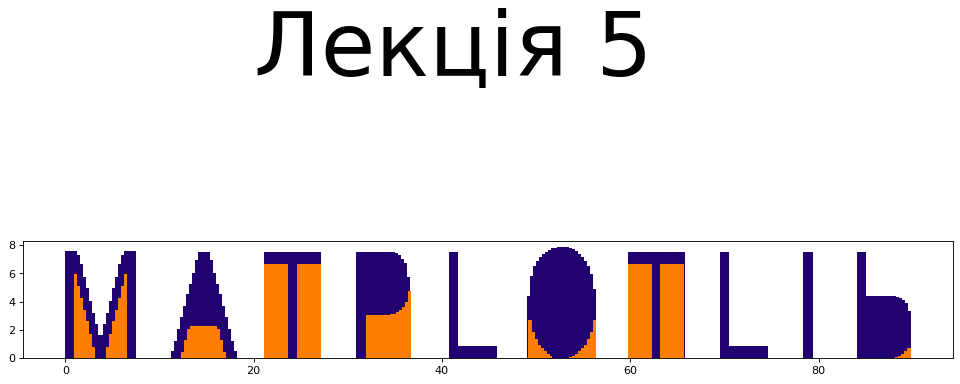

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

r = red[red[:, 0].argsort()]
b = black[black[:, 0].argsort()]


for max_i in range(len(b)):
  plt.figure(figsize=(15, 10), dpi=80)
  plt.bar(b[:max_i, 0], b[:max_i, 1], zorder=0.0, width=0.35, color='#21006ffe')
  plt.bar(b[max_i:, 0], b[max_i:, 1], zorder=0.0, width=0.01, color='w')
  plt.axes().set_aspect(1.5) 
  plt.text(20, 20, "–õ–µ–∫—Ü—ñ—è 5", fontsize=80);
  plt.savefig("frame_%03d.png"%max_i, dpi=150)
  plt.close()  


plt.figure(figsize=(15, 10), dpi=80)
plt.bar(r[:, 0], r[:, 1], zorder=1.0, width=0.35, color='#ff7d00ff')
plt.bar(b[:, 0], b[:, 1], zorder=0.0, width=0.35, color='#21006ffe')
plt.axes().set_aspect(1.5)
plt.text(20, 20, "–õ–µ–∫—Ü—ñ—è 5", fontsize=80);
plt.savefig("final.png", dpi=150)

In [ ]:
!zip frames.zip *.png

In [ ]:
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [ ]:
import numpy as np

def reflection(x1, x2, x3, alpha):
  x0 = (x1 + x2) / 2.0
  xr = x0 + alpha * (x0 - x3)
  return xr

def expansion(x1, x2, x3, alpha, gamma):
  return reflection(x1, x2, x3, alpha*gamma)

def contraction(x1, x2, x3, rho):
  return reflection(x1, x2, x3, -rho)

def shrink(x1, x2, x3, sigma):
  return x1, x1 + sigma*(x2 - x1), x1 + sigma*(x3 - x1)

def sort_points(x1, x2, x3, func):
  f = [func(x1), func(x2), func(x3)]
  idx = np.argsort(f)
  sorted = np.array([x1, x2, x3])[idx]
  return sorted[0], sorted[1], sorted[2]

def nelder_mead(x_ini, num_iter, func_to_minimize, draw_position):
  step  = 1.0
  alpha = 1.0
  gamma = 2.0
  rho   = 0.5
  sigma = 0.5

  x1, x2, x3 = x_ini, x_ini + np.array([0.0, step]), x_ini + np.array([step, 0.0])
  for _ in range(num_iter):
    draw_position(x1, x2, x3) # used for visualization, just pass 3 np.arrays x1,x2,x3
    x1, x2, x3 = sort_points(x1, x2, x3, func_to_minimize)
    xr = reflection(x1, x2, x3, alpha)
    if (func_to_minimize(xr) < func_to_minimize(x1)):
      xe = expansion(x1, x2, x3, alpha, gamma)
      x3 = xe if (func_to_minimize(xe) < func_to_minimize(xr)) else xr
    else:
      if (func_to_minimize(xr) < func_to_minimize(x2)):
        x3 = xr
      else:
        xc = contraction(x1, x2, x3, rho)
        if (func_to_minimize(xc) < func_to_minimize(x3)):
          x3 = xc
        else:
          x1, x2, x3 = shrink(x1, x2, x3, sigma)

class Memory:
  def __init__(self):
    self.x_ini = -1.0
    self.y_ini = -1.5
    self.iters = 20
    self.function = '(1-x)**2+10*(y-x**2)**2'

current_memory = Memory()

x_ini = current_memory.x_ini
y_ini = current_memory.y_ini
max_iter = current_memory.iters


from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
from scipy.optimize import minimize

from sympy.parsing.sympy_parser import standard_transformations, implicit_multiplication_application, parse_expr
transformations = (standard_transformations + (implicit_multiplication_application,))
f = parse_expr(current_memory.function, transformations=transformations)

from sympy import lambdify
ftm = lambdify(['x', 'y'], f, "numpy")
func_to_minimize = lambda x: ftm(x[0], x[1])
crashed = False

history = []
def remember(x1, x2, x3):
  history.append([x1, x2, x3])
nelder_mead(np.array([x_ini, y_ini]), max_iter, func_to_minimize, remember)


_h = np.array(history)
_x = [[h[0][0], h[1][0], h[2][0], h[0][0]] for h in history]
_y = [[h[0][1], h[1][1], h[2][1], h[0][1]] for h in history]
_z = [[func_to_minimize(h[0]), func_to_minimize(h[1]), func_to_minimize(h[2]), func_to_minimize(h[0])] for h in history]

x_min = min(-2.0, np.min(_x))
x_max = max(2.0, np.max(_x))
y_min = min(-2.0, np.min(_y))
y_max = max(2.0, np.max(_y))

x_ = np.linspace(x_min, x_max, num=50)
y_ = np.linspace(y_min, y_max, num=50)
z_ = np.array([[func_to_minimize([x,y]) for x in x_] for y in y_], dtype=float)


if np.max(z_) - np.min(z_) > 300:
  z_ = np.sign(z_)*np.log(np.abs(z_) + 1.0)


for i,[x,y] in enumerate(zip(_x, _y)):
  #print(i,x,y)
  fig = dict(
      layout = dict(
          width=1280, height=720, autosize=False,
          showlegend = False,
          xaxis1 = {'domain': [0, 1], 'range': [x_min, x_max], 'fixedrange': True, 'showticklabels': False},
          yaxis1 = {'domain': [0, 1], 'range': [y_min, y_max], 'fixedrange': True, 'showticklabels': False},
          title  = 'Minimization',
          margin = {'t': 0, 'b': 0, 'l': 0, 'r': 0},
      ),
      data = [
          {'type': 'scatter', 'name': 's2', 'x': x, 'y': y, 
          'line': {'color': 'rgb(0.85, 0.85, 0.85)', 'width': 4},
          'marker': {'size': 12},
          'mode': 'lines'
          },
          {
            'x': x_, 'y': y_, 'z': z_, 
            'showscale': False, 
            'opacity': 0.9, 
            'type': 'contour',
            #'colorscale': 'Viridis'
            'colorscale': [[0,    "rgb(0,0,0)"],
                           [0.25, "rgb(10,10,10)"],
                           [0.45, "rgb(20,20,20)"],
                           [0.65, "rgb(30,30,30)"],
                           [0.85, "rgb(40,40,40)"],
                           [1,    "rgb(50,0,0)"]],
           'line': {'color': 'white', 'width':2}
           #'contours': {'color': 'white'}
          },
      ],
  )

  f = go.Figure(fig)
  #f.show()
  f.write_image("fig" + str(i) + ".png")



0 [-1.0, -1.0, 0.0, -1.0] [-1.5, -0.5, -1.5, -1.5]
1 [0.0, -1.0, 0.5, 0.0] [-1.5, -0.5, 0.0, -1.5]
2 [0.5, 0.0, -0.375, 0.5] [0.0, -1.5, -0.625, 0.0]
3 [0.5, -0.375, 0.03125, 0.5] [0.0, -0.625, -0.90625, 0.0]
4 [0.5, -0.375, 0.09375, 0.5] [0.0, -0.625, 0.28125, 0.0]
5 [0.5, 0.09375, 0.96875, 0.5] [0.0, 0.28125, 0.90625, 0.0]
6 [0.96875, 0.5, 0.4140625, 0.96875] [0.90625, 0.0, 0.3671875, 0.90625]
7 [0.96875, 0.4140625, 0.595703125, 0.96875] [0.90625, 0.3671875, 0.318359375, 0.90625]
8 [0.96875, 0.595703125, 0.59814453125, 0.96875] [0.90625, 0.318359375, 0.48974609375, 0.90625]
9 [0.96875, 0.595703125, 0.690185546875, 0.96875] [0.90625, 0.318359375, 0.551025390625, 0.90625]
10 [0.96875, 0.690185546875, 1.063232421875, 0.96875] [0.90625, 0.551025390625, 1.138916015625, 0.90625]
11 [1.063232421875, 0.96875, 0.85308837890625, 1.063232421875] [1.138916015625, 0.90625, 0.78680419921875, 1.138916015625]
12 [1.063232421875, 0.96875, 0.934539794921875, 1.063232421875] [1.138916015625, 0.90625, 0

In [ ]:
!zip imgs.zip *.png

#Video tests

In [ ]:
# This script copies the video frame by frame
import cv2
import subprocess as sp

cap_sub = cv2.VideoCapture('sub.mpg')
ret, frame_sub = cap_sub.read()


input_file = 'base.mpg'
output_file = 'result.mp4'

cap = cv2.VideoCapture(input_file)
ret, frame = cap.read()
height, width, ch = frame.shape

ffmpeg = 'ffmpeg'
dimension = '{}x{}'.format(width, height)
f_format = 'bgr24' # remember OpenCV uses bgr format
fps = str(cap.get(cv2.CAP_PROP_FPS))

command = [ffmpeg,
        '-y',
        '-f', 'rawvideo',
        '-vcodec','rawvideo',
        '-s', dimension,
        '-pix_fmt', 'bgr24',
        '-r', fps,
        '-i', '-',
        '-an',
        '-vcodec', 'mpeg4',
        '-b:v', '5000k',
        output_file ]

proc = sp.Popen(command, stdin=sp.PIPE, stderr=sp.PIPE)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    mask = np.sum((frame - frame_sub)**2, axis=2) < 200
    mask = np.stack([mask, mask, mask], axis=2)
    frame[mask] = 255
    proc.stdin.write(frame.tostring())

cap.release()
proc.stdin.close()
proc.stderr.close()
proc.wait()

In [ ]:
import cv2
 
cap_sub = cv2.VideoCapture('sub.mpg')
cap = cv2.VideoCapture('base.mpg')
out = None
ret, frame_sub = cap_sub.read()

i = 0
while(cap.isOpened()):
  ret, frame = cap.read()
  if ret == False:
    break
  if out == None:
    print('HERE')
    w, h, c = frame.shape
    out = cv2.VideoWriter('result.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, (h,w))
  mask = np.sum((frame - frame_sub)**2, axis=2) < 200
  mask = np.stack([mask, mask, mask], axis=2)
  frame[mask] = 255
  #print(mask.shape)
  out.write(frame)
  i += 1
  if i % 10 == 0:
    print(i)

out.release()
cap.release()
cv2.destroyAllWindows()

#Altair tests

In [ ]:
import altair as alt
from vega_datasets import data

source = data.population.url

pink_blue = alt.Scale(domain=('Male', 'Female'),
                      range=["steelblue", "salmon"])

slider = alt.binding_range(min=1900, max=2000, step=10)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2000})

alt.Chart(source).mark_bar().encode(
    x=alt.X('sex:N', title=None),
    y=alt.Y('people:Q', scale=alt.Scale(domain=(0, 12000000))),
    color=alt.Color('sex:N', scale=pink_blue),
    column='age:O'
).properties(
    width=20
).add_selection(
    select_year
).transform_calculate(
    "sex", alt.expr.if_(alt.datum.sex == 1, "Male", "Female")
).transform_filter(
    select_year
).configure_facet(
    spacing=8
)

<a name='plotly'></a>
#Plotly tests


In [ ]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)

In [ ]:
enable_plotly_in_cell()
import plotly.offline as py
import plotly.graph_objs as go

import numpy as np

s = np.linspace(0, 2 * np.pi, 240)
t = np.linspace(0, np.pi, 240)
tGrid, sGrid = np.meshgrid(s, t)

r = 2 + np.sin(7 * sGrid + 5 * tGrid)  # r = 2 + sin(7s+5t)
x = r * np.cos(sGrid) * np.sin(tGrid)  # x = r*cos(s)*sin(t)
y = r * np.sin(sGrid) * np.sin(tGrid)  # y = r*sin(s)*sin(t)
z = r * np.cos(tGrid)                  # z = r*cos(t)

surface = go.Surface(x=x, y=y, z=z)
data = [surface]

layout = go.Layout(
    title='Parametric Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)#, filename='jupyter-parametric_plot')

In [ ]:
enable_plotly_in_cell()
import plotly.offline as py
import numpy as np

data = [dict(
        visible = False,
        line=dict(color='#ff0000', width=6),
        name = 'ùúà = '+str(step),
        x = np.arange(0,10,0.01),
        y = np.sin(step*np.arange(0,10,0.01))) for step in np.arange(0,5,0.1)]
data[10]['visible'] = True

steps = []
for i in range(len(data)):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "Frequency: "},
    pad = {"t": 50},
    steps = steps
)]

layout = dict(sliders=sliders)
fig = dict(data=data, layout=layout)

py.iplot(fig)#, filename='Sine Wave Slider')

In [ ]:
enable_plotly_in_cell()
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML

init_notebook_mode(connected=False)

figure = {'data': [{'x': [0, 1, 2], 'y': [0, 1, 3]}],
          'layout': {'xaxis': {'range': [0, 5], 'autorange': False},
                     'yaxis': {'range': [0, 5], 'autorange': False},
                     'title': 'Start Title',
                     'updatemenus': [{'type': 'buttons',
                                      'buttons': [{'label': 'Play',
                                                   'method': 'animate',
                                                   'args': [None]}]}]
                    },
          'frames': [{'data': [{'x': [1, 2, 2], 'y': [1, 2, 3]}]},
                     {'data': [{'x': [1, 4, 2], 'y': [1, 4, 3]}]},
                     {'data': [{'x': [3, 4, 2], 'y': [3, 4, 3]}],
                      'layout': {'title': 'End Title'}}]}

iplot(figure)

In [ ]:
enable_plotly_in_cell()
import plotly.offline as py
import plotly.graph_objs as go

trace = go.Heatmap(z=[[1, 20, 30],
                      [20, 1, 60],
                      [30, 60, 1]])
data=[trace]
py.iplot(data, filename='basic-heatmap')

# IPyWidgets tests

In [ ]:
import ipywidgets as widgets

widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

In [ ]:
a = widgets.IntSlider(description='a')
b = widgets.IntSlider(description='b')
c = widgets.IntSlider(description='c')
def f(a, b, c):
    print('{}*{}*{}={}'.format(a, b, c, a*b*c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

widgets.HBox([widgets.VBox([a, b, c]), out])

#Python plus JS tests

In [ ]:
import numpy as np

f_w = 5
f_h = 5
mines = [[i+j for i in range(f_w)] for j in range(f_h)]
field = [[-1 for i in range(f_w)] for j in range(f_h)]

style_str = '''
<style>
   div { 
    font-size: 120%; 
    font-family: Verdana, Arial, Helvetica, sans-serif; 
    color: #333366; 
    width:  30px;
    height: 30px;
    background-color: RGB(50, 255, 50);
   }
  </style>
'''


import IPython
from google.colab import output

def generate_grid_html(w, h, fld):
  s = style_str
  s += '<table>\n'
  for y in range(h):
    s += '\t<tr>\n'
    for x in range(w):
      s += '\t\t<td>'
      if fld[y][x] == -1:
        s += '<div '
        s += 'onclick=\"google.colab.kernel.invokeFunction(\'notebook.FieldClick\', ['
        s += str(x) + ',' + str(y) 
        s += ' ], {})\"></div>'
      else:
        s += str(fld[y][x])
      s += '</td>\n'
    s += '\t</tr>\n'
  s += '</table>'
  #print(s)
  return s
  

display(IPython.display.HTML(generate_grid_html(f_w, f_h, field)))


def field_click(x, y):
  field[y][x] = mines[y][x]
  output.clear(wait=False)
  display(IPython.display.HTML(generate_grid_html(f_w, f_h, field)))

output.register_callback('notebook.FieldClick', field_click)

In [ ]:
from IPython.core.magic import  Magics, magics_class, cell_magic, line_magic

class B(dict):
    def __getattr__(self, name):
        return self.__getitem__(name)

@magics_class
class StoreSQL(Magics):

    def __init__(self, shell=None,  **kwargs):
        super().__init__(shell=shell, **kwargs)
        self._store = []
        self._store2 = B()
        # inject our store in user availlable namespace under __mystore name
        shell.user_ns['__mystore'] = self._store
        shell.user_ns['__mystore2'] = self._store2

    @cell_magic
    def sql(self, line, cell):
        """store the cell in the store"""
        self._store.append(cell)

    @cell_magic
    def sqlnamed(self, line, cell):
        """store the cell in the store"""
        self._store2[line.strip()] = cell

        
    @line_magic
    def showsql(self, line):
        """show all recorded statements"""
        print(self._store)
        print(self._store2)
                
## use ipython load_ext mechanism here if distributed
get_ipython().register_magics(StoreSQL)

In [ ]:
%%sql 
select * from foo Where QUX Bar

In [ ]:
%%sqlnamed thisIsFun
this is sql2 cell Fun

In [ ]:
%showsql

['select * from foo Where QUX Bar', 'import IPython\nfrom google.colab import output\nimport inspect\nimport urllib.parse\nimport dill\n\ndef main():\n  def yo(X, Y):\n   return X + Y\n\n  def do_smth():\n    x = 1\n    y = 2\n    for i in range(5):\n      x = yo(x,y)\n      print(x)\n      \n  do_smth()\n\nsrc = inspect.getsource(main) + \'main()\'\nurl_src = urllib.parse.quote(src)\n#print(src)\n\nstr_begin = \'\'\'\n<iframe width="1000" height="500" frameborder="0"\n        src="https://pythontutor.com/iframe-embed.html#code=\'\'\'\n    \nstr_end = \'\'\'\n&cumulative=false&py=3&curInstr=1">\n</iframe>\n\'\'\'\n\ndisplay(IPython.display.HTML(str_begin+url_src+str_end))']
{'thisIsFun': 'this is sql2 cell Fun'}


In [ ]:

def yo(X, Y):
  return X + Y

def do_smth():
  x = 1
  y = 2
  for i in range(5):
    x = yo(x,y)
    print(x)
    
do_smth()

3
5
7
9
11


In [ ]:
%%sql
import IPython
from google.colab import output
import inspect
import urllib.parse
import dill

def main():
  def yo(X, Y):
   return X + Y

  def do_smth():
    x = 1
    y = 2
    for i in range(5):
      x = yo(x,y)
      print(x)
      
  do_smth()

src = inspect.getsource(main) + 'main()'
url_src = urllib.parse.quote(src)
#print(src)

str_begin = '''
<iframe width="1000" height="500" frameborder="0"
        src="https://pythontutor.com/iframe-embed.html#code='''
    
str_end = '''
&cumulative=false&py=3&curInstr=1">
</iframe>
'''

display(IPython.display.HTML(str_begin+url_src+str_end))

In [ ]:
!pip install transcrypt

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 32.2MB 109kB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24.1MB 1.7MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 737kB 33.7MB/s 
  Created wheel for transcrypt: filename=Transcrypt-3.7.16-py2.py3-none-any.whl size=38558883 sha256=5321d17dcda6edcf51809e386852de45e41d37dd2bbe5b9302b9f56fca0483b9
  Stored in directory: /root/.cache/pip/wheels/66/c6/53/9d326f43625e528d12c0d05efd461983242c70cdf91dbd3dba
Successfully built transcrypt
ERROR: chainer 6.5.0 has requirement typing-extensions<=3.6.6, but you'll have typing-extensions 3.7.4.1 which is incompatible.
  Found existing installation: typing-extensions 3.6.6
    Uninstalling typing-extensions-3.6.6:
      Successfully uninstalled typing-extensions-3.6.6


In [ ]:
%%writefile hello.py

#from itertools import chain

class SolarSystem:
    planets = [list (chain (planet, (index + 1,))) for index, planet in enumerate ((
        ('Mercury', 'hot', 2240),
        ('Venus', 'sulphurous', 6052),
        ('Earth', 'fertile', 6378),
        ('Mars', 'reddish', 3397),
        ('Jupiter', 'stormy', 71492),
        ('Saturn', 'ringed', 60268),
        ('Uranus', 'cold', 25559),
        ('Neptune', 'very cold', 24766) 
    ))]
    
    lines = (
        '{} is a {} planet',
        'The radius of {} is {} km',
        '{} is planet nr. {} counting from the sun'
    )
    
    def __init__ (self):
        self.lineIndex = 0
    
    def greet (self):
        self.planet = self.planets [int (Math.random () * len (self.planets))]
        document.getElementById ('greet') .innerHTML = 'Hello {}'.format (self.planet [0])
        self.explain ()
        
    def explain (self):
        document.getElementById ('explain').innerHTML = (
            self.lines [self.lineIndex] .format (self.planet [0], self.planet [self.lineIndex + 1])
        )
        self.lineIndex = (self.lineIndex + 1) % 3
        
solarSystem = SolarSystem ()

Overwriting hello.py


In [ ]:
%%writefile hello.html
<script type="module">import * as hello from './__target__/hello.js'; window.hello = hello;</script>
<h2>Hello demo</h2>

<p>
<div id = "greet">...</div>
<button onclick="hello.solarSystem.greet ()">Click me repeatedly!</button>

<p>
<div id = "explain">...</div>
<button onclick="hello.solarSystem.explain ()">And click me repeatedly too!</button>

Writing hello.html


In [ ]:
!transcrypt -b -m -n hello.py


Transcrypt (TM) Python to JavaScript Small Sane Subset Transpiler Version 3.7.16
Copyright (C) Geatec Engineering. License: Apache 2.0


Saving target code in: /content/__target__/org.transcrypt.__runtime__.js
Saving target code in: /content/__target__/hello.js

Ready



In [ ]:
!tar xjf Brython-3.8.6.tar.bz2

In [ ]:
L = [1,2,3]
L.append([1,2])
L

[1, 2, 3, [1, 2]]

In [ ]:
import json

l = [{56: "john", "age": {'YO':'ii'}}, 2, {"name": "john", "age": 13},4,5]
with open('dump.txt', 'w') as f_out:
  f_out.write(json.dumps(l))

In [ ]:
with open('dump.txt', 'r') as f_in:
  obj = json.loads('\n'.join(f_in.readlines()))
  print(obj)
  print(obj[0]['age']['YO'])

[{'56': 'john', 'age': {'YO': 'ii'}}, 2, {'name': 'john', 'age': 13}, 4, 5]
ii


In [ ]:
import random

dir(random)

In [ ]:
str_html = '''
<script type="text/javascript" src="https://brython.info/src/brython.js"></script>
<script type="text/javascript" src="https://brython.info/src/brython_stdlib.js"></script>


<script type="text/python3">
"""Code for the clock"""

import time
import math
import datetime

from browser import document as doc
import browser.timer

sin, cos = math.sin, math.cos
width, height = 250, 250 # canvas dimensions
ray = 100 # clock ray

background = "#111"
digits = "#fff"
border = "#333"

def needle(angle, r1, r2, color="#000000"):
    """Draw a needle at specified angle in specified color.
    r1 and r2 are percentages of clock ray.
    """
    x1 = width / 2 - ray * cos(angle) * r1
    y1 = height / 2 - ray * sin(angle) * r1
    x2 = width / 2 + ray * cos(angle) * r2
    y2 = height / 2 + ray * sin(angle) * r2
    ctx.beginPath()
    ctx.strokeStyle = "#fff"
    ctx.moveTo(x1, y1)
    ctx.lineTo(x2, y2)
    ctx.stroke()

def set_clock():
    # erase clock
    ctx.beginPath()
    ctx.fillStyle = background
    ctx.arc(width / 2, height / 2, ray * 0.89, 0, 2 * math.pi)
    ctx.fill()

    # redraw hours
    show_hours()

    # print day
    now = datetime.datetime.now()
    day = now.day
    ctx.font = "bold 14px Arial"
    ctx.textAlign = "center"
    ctx.textBaseline = "middle"
    ctx.fillStyle="#000"
    ctx.fillText(day, width * 0.7, height * 0.5)

    # draw needles for hour, minute, seconds
    ctx.lineWidth = 2
    hour = now.hour % 12 + now.minute / 60
    angle = hour * 2 * math.pi / 12 - math.pi / 2
    needle(angle, 0.05, 0.5)
    minute = now.minute
    angle = minute * 2 *math.pi / 60 - math.pi / 2
    needle(angle, 0.05, 0.85)
    ctx.lineWidth = 1
    second = now.second + now.microsecond / 1000000
    angle = second * 2 * math.pi / 60 - math.pi / 2
    needle(angle, 0.05, 0.85, "#FF0000") # in red

def show_hours():
    ctx.beginPath()
    ctx.arc(width / 2, height / 2, ray * 0.05, 0, 2 * math.pi)
    ctx.fillStyle = digits
    ctx.fill()
    for i in range(1, 13):
        angle = i * math.pi / 6 - math.pi / 2
        x3 = width / 2 + ray * cos(angle) * 0.75
        y3 = height / 2 + ray * sin(angle) * 0.75
        ctx.font = "18px Arial"
        ctx.textAlign = "center"
        ctx.textBaseline = "middle"
        ctx.fillText(i, x3, y3)
    # cell for day
    ctx.fillStyle = "#fff"
    ctx.fillRect(width * 0.65, height * 0.47, width * 0.1, height * 0.06)

canvas = doc["clock"]
# draw clock border
if hasattr(canvas, 'getContext'):
    ctx = canvas.getContext("2d")

    ctx.beginPath()
    ctx.arc(width / 2, height / 2, ray, 0, 2 * math.pi)
    ctx.fillStyle = background
    ctx.fill()

    ctx.beginPath()
    ctx.lineWidth = 6
    ctx.arc(width / 2,height / 2, ray + 3, 0, 2 * math.pi)
    ctx.strokeStyle = border
    ctx.stroke()

    for i in range(60):
        ctx.lineWidth = 1
        if i%5 == 0:
            ctx.lineWidth = 3
        angle = i * 2 * math.pi / 60 - math.pi / 3
        x1 = width / 2 + ray * cos(angle)
        y1 = height / 2 + ray * sin(angle)
        x2 = width / 2 + ray * cos(angle) * 0.9
        y2 = height / 2 + ray * sin(angle) * 0.9
        ctx.beginPath()
        ctx.strokeStyle = digits
        ctx.moveTo(x1, y1)
        ctx.lineTo(x2, y2)
        ctx.stroke()
    browser.timer.set_interval(set_clock, 100)
    show_hours()
else:
    doc['navig_zone'].html = "On Internet Explorer 9 or more, use a Standard rendering engine"

</script>

Hello

<canvas width="250" height="250" id="clock">
<i>sorry, Brython can't make the demo work on your browser ; <br>check if Javascript is turned on
<br><div id="navig_zone"></div></i>
</canvas>

<script>
brython(1)
</script>
'''

import IPython
display(IPython.display.HTML(str_html))


In [ ]:
!cp Brython-3.8.6/brython_stdlib.js ./

<a name='intro'></a>
#Face Recognition Experiments


In [ ]:
# positive samples
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
positive_patches = faces.images
positive_patches.shape

In [ ]:
# negative samples
from skimage import data, color, feature
from skimage import data, transform
import numpy as np

imgs_to_use = ['camera', 'text', 'coins', 'moon',
               'page', 'clock', 'immunohistochemistry',
               'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)()) for name in imgs_to_use]

from sklearn.feature_extraction.image import PatchExtractor

def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size, max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size) for patch in patches])
    return patches

negative_patches = np.vstack([extract_patches(im, 500, scale)
                              for im in images for scale in [0.5, 1.0, 2.0]])
negative_patches.shape

In [ ]:
# collect dataset
from itertools import chain
X_train = np.array([feature.hog(im)
                    for im in chain(positive_patches, negative_patches)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1
X_train.shape

In [ ]:
# Grid search for best parameters
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

#from sklearn.svm import SVC
#model = SVC(kernel='rbf', C=1E1, gamma='auto')
#model.fit(X_train, y_train)

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]}, cv=3)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
model = grid.best_estimator_
model.fit(X_train, y_train)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import skimage.data
import matplotlib.pyplot as plt

import imageio
test_image = imageio.imread("photo.jpg", pilmode='F')


#test_image = skimage.data.astronaut()
#test_image = skimage.color.rgb2gray(test_image)
test_image = skimage.transform.rescale(test_image, 0.4)
#test_image = test_image[:160, 40:180]

#print(test_image[:10,:10])

plt.imshow(test_image, cmap='gray')
plt.axis('off');
plt.show()

def sliding_window(img):
  size = positive_patches[0].shape
  istep, jstep = 3, 3
  for Nx in [60, 80, 100]:
    Ny = int(size[1] / size[0] * Nx)
    for i in range(0, img.shape[0] - Nx, istep):
      for j in range(0, img.shape[1] - Ny, jstep):
        yield (i, j, Ny, Nx), transform.resize(img[i:i + Nx, j:j + Ny], size)
            
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])
print(patches_hog.shape)

labels = model.predict(patches_hog)
print(labels.sum())

fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')

indices = np.array(indices)

for i, j, w, h in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j, i), w, h, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))

In [ ]:
!wget http://tamaraberg.com/faceDataset/originalPics.tar.gz
!wget http://vis-www.cs.umass.edu/fddb/FDDB-folds.tgz

In [ ]:
!tar zxvf FDDB-folds.tgz
!tar zxvf originalPics.tar.gz

In [ ]:
!cat FDDB-folds/FDDB-fold-01-ellipseList.txt

In [ ]:
!rm -rf ./lfwcrop_grey

In [ ]:
# GET NEW DATASETS
!wget http://conradsanderson.id.au/lfwcrop/lfwcrop_grey.zip
!unzip lfwcrop_grey.zip > /dev/null
!wget http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz
!tar zxvf stl10_binary.tar.gz

import re
import numpy
from PIL import Image

def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.
    Format specification: http://netpbm.sourceforge.net/doc/pgm.html
    """
    img = Image.open(filename)
    img = img.resize((64, 64))
    img = img.convert(mode='L')
    a = np.array(img)
    return a / np.sum(a)

def conv_im(img):
  img = Image.fromarray(img, 'RGB')
  img = img.resize((64, 64))
  img = img.convert(mode='L')
  a = np.array(img)
  return a / np.sum(a)

import numpy as np
def img_to_arr(path):
  image = read_pgm(path, byteorder='<')
  arr = image / np.sum(image)
  return arr


from matplotlib import pyplot
import glob

def load_and_conv_faces():
  files = [f for f in glob.glob("./lfwcrop_grey/**/*.pgm", recursive=True)]
  list_faces = []
  for f in files:
    list_faces.append(img_to_arr(f))
  np.save('faces', np.array(list_faces), allow_pickle=False)

load_and_conv_faces()

def read_all_images(path_to_data):
    """
    :param path_to_data: the file containing the binary images from the STL-10 dataset
    :return: an array containing all the images
    """
    with open(path_to_data, 'rb') as f:
        everything = np.fromfile(f, dtype=np.uint8)
        images = np.reshape(everything, (-1, 3, 96, 96))
        images = np.transpose(images, (0, 3, 2, 1))
        return images


def load_and_conv_other():
  arr = read_all_images("stl10_binary/unlabeled_X.bin")
  lst_imgs = [conv_im(arr[idx]) for idx in range(0, 100000, 5)]
  np.save('not_faces', np.array(lst_imgs), allow_pickle=False)

load_and_conv_other()

!rm -rf ./lfwcrop_grey
!rm -rf ./stl10_binary
!rm lfwcrop_grey.zip
!rm stl10_binary.tar.gz

In [ ]:
def load():
  faces = np.load('faces.npy')
  not_faces = np.load('not_faces.npy')
  print(faces.shape, not_faces.shape)
  return np.concatenate((faces, not_faces), axis=0)

all_data = load()

from skimage import feature
#all_features = np.array([feature.hog(img, multichannel=False) for img in all_data])
all_features = np.array([img.ravel() for img in all_data])

from sklearn.manifold import Isomap
model = Isomap(n_components=2)
model.fit(all_features[::100])

In [ ]:
projected = model.transform(all_features[3::50])
y = np.concatenate([np.zeros(13233), np.ones(20000)])
y = y[3::50]
y.shape, projected.shape

In [ ]:
import matplotlib.pyplot as plt

cmap = {0: 'r', 1: 'g'}
colors = [cmap[d] for d in y]
plt.scatter(projected[:, 0], projected[:, 1], c=colors, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

R, G, B = projected[:, 0], projected[:, 1], projected[:, 2]
cmap = {0: 'rgba(0,0,255,255)', 1: 'rgba(0,255,0,255)', 2: 'rgba(255,0,0,255)',
        3: 'rgba(0,0,128,255)', 4: 'rgba(0,128,0,255)', 5: 'rgba(128,0,255)',
        6: 'rgba(0,0,64,255)', 7: 'rgba(0,64,0,255)', 8: 'rgba(64,0,0,255)',
        9: 'rgba(0,0,0,255)'}
colors = [cmap[d] for d in y]
#['rgba(' + ','.join([str(r*255), str(g*255), str(b*255)]) + ', 255)' for r,g,b in zip(R,G,B)]

fig = make_subplots(rows=1, cols=1, specs=[[{"type": "scene"}]])

fig.add_trace(go.Scatter3d(x=R, y=G, z=B, mode='markers', 
                           marker=dict(size=4, color=colors)),
              row=1, col=1)

fig.update_layout(width=600, height=600, autosize=False, 
                  title_text="Color scale demonstration",
                  scene={"xaxis": {"title": "R"},
                         "yaxis": {"title": "G"},
                         "zaxis": {"title": "B"}},
                  showlegend=False)
      
fig.show()

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"

model_svm = SVC(kernel='rbf', C=1E-3, gamma='auto')
model_svm.fit(projected, y)

In [ ]:
import skimage.data
import matplotlib.pyplot as plt
from skimage import data, transform

import imageio
test_image = imageio.imread("download.png", pilmode='F')


#test_image = skimage.data.astronaut()
#test_image = skimage.color.rgb2gray(test_image)
test_image = skimage.transform.rescale(test_image, 300.0 / test_image.shape[0])
#test_image = test_image[:160, 40:180]

#print(test_image[:10,:10])

plt.imshow(test_image, cmap='gray')
plt.axis('off');
plt.show()

def sliding_window(img):
  size = [64, 64]
  for Nx in [20, 30, 40]:
    Ny = int(size[1] / size[0] * Nx)
    istep, jstep = int(Nx / 5), int(Ny / 5)
    for i in range(0, img.shape[0] - Nx, istep):
      for j in range(0, img.shape[1] - Ny, jstep):
        new_img = transform.resize(img[i:i + Nx, j:j + Ny], size)
        # division changes result
        yield (i, j, Ny, Nx), new_img / np.sum(new_img)
            
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([patch.ravel() for patch in patches]) #np.array([feature.hog(patch) for patch in patches])
print(patches_hog.shape)
features = model.transform(patches_hog)
labels = model_svm.predict(features)
print(labels.sum())

fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')

indices = np.array(indices)

for i, j, w, h in indices[labels == 0]:
    ax.add_patch(plt.Rectangle((j, i), w, h, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))

In [ ]:
pyplot.imshow(all_data[100])

In [ ]:
model_svm.predict(model.transform([feature.hog(all_data[-290])]))

In [ ]:
all_data.shape

# Datasaurus

In [ ]:
#@title Frames collection tool (clears dataset variable on restart!)
import numpy as np
import json

dataset = []
def add_to_dataset(X, y):
  dataset.append(X)

def invoke_SVM(pts):
  data = np.array(pts).reshape((-1, 3))
  X = data[:, :2] / 300.0 - 1.0
  X[:, 1] *= -1.0
  y = data[:, 2]
  add_to_dataset(X, y)
  return IPython.display.JSON({})


import IPython
from google.colab import output

main_str_lin = '''
  <script type="application/javascript">
  
    var active_pt = null;
    var all_pts = [];
    var class_btn = [[650, 50], [650, 150], [650, 250], [650, 350], [650, 450]];
    var class_name = ["class A", "class B", "class C", "class D", "class E"];
    var class_color = ["rgba(210, 0, 0, 0.75)", "rgba(0, 0, 150, 0.75)", 
         "rgba(107, 142, 35, 0.95)", "rgba(150, 0, 150, 0.75)", "rgba(220, 105, 0, 0.75)"]

    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
  
    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos, cls) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = class_color[cls];
      ctx.fill();
    }
    
    function gen_path(w0, w1, b) {
      var arr = [];
      
      var x = -b/w0;
      if (x >= 0 && x <= 600) { arr.push([Math.round(x), 0]); }
      x = -(b + w1*600.0)/w0;
      if (x >= 0 && x <= 600) { arr.push([Math.round(x), 600]); }
      var y = -b/w1;
      if (y >= 0 && y <= 600) { arr.push([0, Math.round(y)]); }
      y = -(b + w0*600.0)/w1;
      if (y >= 0 && y <= 600) { arr.push([600, Math.round(y)]); }
      
      return arr;
    }
    
    function gen_cls(w0, w1, b, sep_line, sign) {
          var half_rect = [];
          if (sign * (w0*0 + w1*0 + b) > 0) {half_rect.push([0, 0]);}
          if (sep_line[0][0] == 0) {half_rect.push(sep_line[0]);}
          if (sep_line[1][0] == 0) {half_rect.push(sep_line[1]);}
          if (sign * (w0*0 + w1*600 + b) > 0) {half_rect.push([0, 600]);}
          if (sep_line[0][1] == 600) {half_rect.push(sep_line[0]);}
          if (sep_line[1][1] == 600) {half_rect.push(sep_line[1]);}
          if (sign * (w0*600 + w1*600 + b) > 0) {half_rect.push([600, 600]);}
          if (sep_line[0][0] == 600) {half_rect.push(sep_line[0]);}
          if (sep_line[1][0] == 600) {half_rect.push(sep_line[1]);}
          if (sign * (w0*600 + w1*0 + b) > 0) {half_rect.push([600, 0]);}
          if (sep_line[0][1] == 0) {half_rect.push(sep_line[0]);}
          if (sep_line[1][1] == 0) {half_rect.push(sep_line[1]);}
          
          return half_rect;
    }
  
    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.strokeRect(0, 0, 600, 600); // field

        ctx.fillText(debug_txt, 200, 200);

        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]], active_pt[2]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]], item[2]);
        });
        
        if (params) {
          var w0 = parseFloat(params.w0);
          var w1 = parseFloat(params.w1);
          var b = parseFloat(params.b);
          var sep_line = gen_path(w0, w1, b);
          ctx.fillStyle = 'black';
          if (sep_line.length >= 2) {
            ctx.beginPath();
            ctx.moveTo(sep_line[0][0], sep_line[0][1]);
            ctx.lineTo(sep_line[1][0], sep_line[1][1]);
            ctx.stroke();
          }
          
          ctx.setLineDash([5, 15]);
          var d_line = gen_path(w0, w1, b-1);
          if (d_line.length >= 2) {
            ctx.beginPath();
            ctx.moveTo(d_line[0][0], d_line[0][1]);
            ctx.lineTo(d_line[1][0], d_line[1][1]);
            ctx.stroke();
          }
          d_line = gen_path(w0, w1, b+1);
          if (d_line.length >= 2) {
            ctx.beginPath();
            ctx.moveTo(d_line[0][0], d_line[0][1]);
            ctx.lineTo(d_line[1][0], d_line[1][1]);
            ctx.stroke();
          }
          ctx.setLineDash([]);
          
          var half_rect = gen_cls(w0, w1, b, sep_line, 1);
          if (half_rect.length >= 3) {
            ctx.fillStyle = 'rgba(0, 0, 200, 0.1)';
            ctx.beginPath();
            ctx.moveTo(half_rect[0][0], half_rect[0][1]);
            for (var i = 1; i < half_rect.length; i++) {
              ctx.lineTo(half_rect[i][0], half_rect[i][1]);
            }
            ctx.fill();
          }
          
          half_rect = gen_cls(w0, w1, b, sep_line, -1);
          if (half_rect.length >= 3) {
            ctx.fillStyle = 'rgba(200, 0, 0, 0.1)';
            ctx.beginPath();
            ctx.moveTo(half_rect[0][0], half_rect[0][1]);
            for (var i = 1; i < half_rect.length; i++) {
              ctx.lineTo(half_rect[i][0], half_rect[i][1]);
            }
            ctx.fill();
          }
          
          //debug_txt = params.v;
          support_v = JSON.parse(params.v);
          
          //debug_txt = support_v[0][0].toString();
          support_v.forEach(function (item, index) {
            ctx.beginPath();
            ctx.arc(item[0], item[1], ptR/2.0, 0.0, 2.0 * Math.PI, 0);
            ctx.fillStyle = 'yellow';
            ctx.fill();
          });
         

        }
        
        
      }
    }
    
    var timer
    function init() {
      timer = setInterval(draw, 10);
    }

    function get_state() {
      var rates = document.getElementsByName('rate');
      for(var i = 0; i < rates.length; i++)
        if(rates[i].checked)
          return rates[i].value;
      return "none";
    }

    
    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      state = get_state();
      if (state.slice(0,3) == "add") {
        var class_idx = parseInt(state.slice(3,4), 10);
        if (x < 600)
            all_pts.push([x, y, class_idx]);
        return;
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx <= -1)
          return;
      if (state == "move") {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
      if (state == "del")
          all_pts.splice(idx, 1);
    }
    
    function mmove_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }
    
    function mup_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }
    
    function clear_field() {
      active_pt = null;
      all_pts = [];
    }

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged], {});
      params = result.data['application/json'];
    }

  function getImageURL(class_idx)
  {
     var canvas = document.createElement('canvas');
     var ctx = canvas.getContext('2d');
     canvas.width  = 2.0 * ptR;
     canvas.height = 2.0 * ptR;
     circ(ctx, [ptR, ptR], class_idx);
     return canvas.toDataURL(); //image URL
  }

  </script>
  <canvas id="canvas" width="800" height="600" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:200px; left:625px;">
   <div style="border-style: solid;">
    <input type="radio" id="r1" name="rate" value="add0" checked="checked"> 
    <img src="" onerror="this.onerror=null; this.src = getImageURL(0); "> Add class A
    <br>
    <input type="radio" id="r1" name="rate" value="add1"> 
    <img src="" onerror="this.onerror=null; this.src = getImageURL(1); "> Add class B
    <br>
    <input type="radio" id="r2" name="rate" value="move"> Move data point
    <br>
    <input type="radio" id="r3" name="rate" value="del"> Delete data point
    <br>
    <button type="button" onclick="clear_field();">
      Clear
    </button>
   </div>
   <br><br>
    <button type="button" onclick="calculate();">
      Invoke SVM
    </button>
  </div>
  <script> init();</script>
'''
  
display(IPython.display.HTML(main_str_lin))
    
output.register_callback('notebook.InvSVM', invoke_SVM)

In [ ]:
#@title #Table exploration tool
import pandas as pd

ds = np.array(dataset)
namesX = ["X_" + str(i) for i in range(ds.shape[1])]
namesY = ["Y_" + str(i) for i in range(ds.shape[1])]
names = [item for sublist in zip(namesX,namesY) for item in sublist]
f_names = ["Frame_" + str(i) for i in range(ds.shape[0])]
df = pd.DataFrame(ds.reshape(ds.shape[0],-1), index=f_names, columns=names)

from google.colab import data_table

(data_table.DataTable(df, include_index=False, num_rows_per_page=10))

In [ ]:
# SAVE DATASET!!!
df.to_csv('datasaurus.csv')

In [ ]:
#@title #Load and animate tool
import pandas as pd

df = pd.read_csv('datasaurus.csv')
a = np.array(df.to_numpy()[:,1:], dtype=float)
s = a.shape
a = a.reshape(s[0], s[1]//2, 2)

import plotly.graph_objects as go

def plot_data(frame):
  return [{'type': 'scatter', 
           'name': 's2', 
           'x': a[frame, :, 0], 
           'y': a[frame, :, 1], 
           'mode': 'markers'
          }
         ]

fig = dict(
    layout = dict(
        width=600, height=600, autosize=False,
        showlegend = False,
        xaxis1 = {'domain': [0.0, 1.0], 'range':[-1.0, 1.0]},
        yaxis1 = {'domain': [0.0, 1.0], 'range':[-1.0, 1.0]},
        title  = 'Video',
        margin = {'t': 50, 'b': 50, 'l': 50, 'r': 50},
        sliders = [{'yanchor': 'top',
                    'xanchor': 'left',
                    'currentvalue': {'font': {'size': 16}, 
                                     'prefix': 'Angle: ', 
                                     'visible': True, 
                                     'xanchor': 'right'},
                    'transition': {'duration': 0.0},
                    'pad': {'b': 10, 't': 50},
                    'len': 0.9,
                    'x': 0.1,
                    'y': 0,
                    'steps': [{'args': [[k], {'frame': 
                                              {'duration': 0.0, 
                                               'easing': 'linear', 
                                               'redraw': True},
                                              'transition': 
                                              {'duration': 0, 
                                               'easing': 'linear'
                                               }
                                              }
                                        ],
                               'label': k,
                               'method': 'animate'} for k in range(s[0])
                    ]}]
    ),
    data = plot_data(0),
    frames=[
        {'name': k,
         'data': plot_data(k)} for k in range(s[0]) ]
)
#plot(fig, auto_open=False)
f = go.Figure(fig)
f.show()

#Selenium tests

In [ ]:
!pip install --upgrade gspread
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

from google.colab import output
output.clear()

In [ ]:
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

from selenium.webdriver.common.by import By
wd = webdriver.Chrome('chromedriver',options=options)


wd.get("https://leetcode.com/problemset/all/?difficulty=Easy")
wd.save_screenshot('scrE.png')

from selenium.webdriver.support.ui import Select
select = Select(wd.find_element(By.TAG_NAME, 'select'))
select.select_by_visible_text("all")

ele = wd.find_element(By.CLASS_NAME, 'question-list-table')
refs = ele.find_elements_by_tag_name('a')

total_list = []
for r in refs:
  new_url = r.get_attribute("href")
  if 'problems' not in new_url:
    continue
  text = r.get_attribute("innerHTML")
  total_list.append(['EASY', text, new_url])


wd.get("https://leetcode.com/problemset/all/?difficulty=Medium")
wd.save_screenshot('scrM.png')
select = Select(wd.find_element(By.TAG_NAME, 'select'))
select.select_by_visible_text("all")
ele = wd.find_element(By.CLASS_NAME, 'question-list-table')
refs = ele.find_elements_by_tag_name('a')

for r in refs:
  new_url = r.get_attribute("href")
  if 'problems' not in new_url:
    continue
  text = r.get_attribute("innerHTML")
  total_list.append(['MEDIUM', text, new_url])


wd.get("https://leetcode.com/problemset/all/?difficulty=Hard")
wd.save_screenshot('scrH.png')
select = Select(wd.find_element(By.TAG_NAME, 'select'))
select.select_by_visible_text("all")
ele = wd.find_element(By.CLASS_NAME, 'question-list-table')
refs = ele.find_elements_by_tag_name('a')


for r in refs:
  new_url = r.get_attribute("href")
  if 'problems' not in new_url:
    continue
  text = r.get_attribute("innerHTML")
  total_list.append(['HARD', text, new_url])


print(len(total_list))

from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

sh = gc.create('Test_Spreadsheet')

workbook = gc.open('Test_Spreadsheet')


def update_level(level):
  easy = [[e[1], e[2]] for e in total_list if e[0] == level]
  worksheet = workbook.add_worksheet(level, rows=len(easy)+1, cols=5)

  name_col = worksheet.range('A1:A' + str(len(easy)+1))
  href_col = worksheet.range('B1:B' + str(len(easy)+1))

  for e,n,h in zip(easy, name_col, href_col):
    n.value = e[0]
    h.value = e[1]

  worksheet.update_cells(name_col)
  worksheet.update_cells(href_col)

update_level('EASY')
update_level('MEDIUM')
update_level('HARD')

In [ ]:
import re
re.sub('\(.*\)', '', 'olol(o)lo')

'olollo'

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

workbook = gc.open('Test_Spreadsheet')
worksheet = workbook.get_worksheet(1)

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
#print(rows)

# Convert to a DataFrame and render.
import pandas as pd
pd.DataFrame.from_records(rows)

is_sol = worksheet.range('C2:C' + str(len(rows)+1))
view_col = worksheet.range('G2:G' + str(len(rows)+1))
like_col = worksheet.range('H2:H' + str(len(rows)+1))
comm_col = worksheet.range('I2:I' + str(len(rows)+1))

print(dir(worksheet.cell(2, 3)))

#for idx, (sol, view, like, comm) in enumerate(zip(is_sol, view_col, like_col, comm_col)):
#  if sol.value == '[SOLUTION]':
#    x = worksheet.cell(idx+2, 3).input_value  #, value_render_option='FORMULA')
#    print(idx+2, sol, x, view, like, comm)

#print(is_sol)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_col', '_row', 'address', 'col', 'from_address', 'input_value', 'numeric_value', 'row', 'value']


In [ ]:
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

from selenium.webdriver.common.by import By
wd = webdriver.Chrome('chromedriver',options=options)


def get_sols(lst_of_probs, sol_col):
  idx = 0
  for [name, url, cached_sol], sol in zip(lst_of_probs, sol_col):

    print(url + '/discuss/?currentPage=1&orderBy=most_relevant&query=andrii_khlevniuk')
    if cached_sol:
      sol.value = cached_sol
      print('cached', cached_sol)
      continue

    wd.get(url + '/discuss/?currentPage=1&orderBy=most_relevant&query=andrii_khlevniuk')
    from selenium.webdriver.support.ui import WebDriverWait
    from selenium.webdriver.support import expected_conditions as EC
    try:
      element = WebDriverWait(wd, 20).until(
          EC.visibility_of_element_located((By.XPATH, '//*[@id="discuss-container"]/div/div/div[2]/div/div[2]/span[1]/span[1]/input'))
      )
      wd.implicitly_wait(20)
    except:
      print("EXCEPTION")
      sol.value = '[EXCEPTION]'
      continue

    try:
      solution = wd.find_element_by_xpath('//*[@id="discuss-container"]/div/div/div[1]/div/div[3]/div/div[2]/div/div/div[1]/div[1]/a')
      sol_path = solution.get_attribute("href")
      print(sol_path)
      sol.value = sol_path
    except:
      print("no such solution")
      sol.value = '[NOT FOUND]'
    
    idx += 1
    if idx % 5 == 0:
      worksheet.update_cells(sol_col)

get_sols(rows, sol_col)
worksheet.update_cells(sol_col)

In [ ]:
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

from selenium.webdriver.common.by import By
wd = webdriver.Chrome('chromedriver',options=options)


def get_sols(lst_of_probs, view_col, like_col, comm_col):
  idx = 0
  for [name, url, cached_sol, _, _], view, like, comm in zip(lst_of_probs, view_col, like_col, comm_col):

    print(cached_sol)
    if 'https' not in cached_sol:
      view.value = ''
      like.value = ''
      comm.value = ''
      continue

    wd.get(cached_sol)
    from selenium.webdriver.support.ui import WebDriverWait
    from selenium.webdriver.support import expected_conditions as EC
    try:
      element = WebDriverWait(wd, 20).until(
          EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/div/div[2]/div[2]/div/div/div[2]/div[1]/div[1]/div/div[2]/span'))
      )
      wd.implicitly_wait(20)
    except:
      like.value = '[EXCEPTION]'
      view.value = '[EXCEPTION]'
      comm.value = '[EXCEPTION]'
      print('error')
      continue

    try:
      likes = wd.find_element_by_xpath('/html/body/div[1]/div/div[2]/div[2]/div/div/div[2]/div[1]/div[1]/div/div[2]/span')
      like.value = likes.get_attribute("innerHTML")
      views = wd.find_element_by_xpath('/html/body/div[1]/div/div[2]/div[2]/div/div/div[2]/div[1]/div[2]/div[1]/div/div/div[2]/p[2]')
      view.value = views.get_attribute("innerHTML")
      coms = wd.find_element_by_xpath('/html/body/div[1]/div/div[2]/div[2]/div/div/div[2]/div[2]/div[1]/div[1]/span')
      comments = coms.get_attribute("innerHTML")
      import re
      comments = re.sub('<.*>', '', comments)
      print(comments)
      comm.value = comments
      print('likes: ', likes.get_attribute("innerHTML"), '   ', views.get_attribute("innerHTML"))
    except:
      like.value = '[EXCEPTION]'
      view.value = '[EXCEPTION]'
      comm.value = '[EXCEPTION]'
      print('error')

    idx += 1
    if idx % 5 == 0:
      worksheet.update_cells(comm_col)
    #  worksheet.update_cells(view_col)
    #  worksheet.update_cells(like_col)

get_sols(rows, view_col, like_col, comm_col)
#worksheet.update_cells(view_col)
#worksheet.update_cells(like_col)
worksheet.update_cells(comm_col)


In [ ]:
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

In [ ]:
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

from selenium.webdriver.common.by import By
wd = webdriver.Chrome('chromedriver',options=options)

In [ ]:

wd.get("https://leetcode.com/problemset/all/?difficulty=Easy")
wd.save_screenshot('scr.png')

from selenium.webdriver.support.ui import Select
select = Select(wd.find_element(By.TAG_NAME, 'select'))
select.select_by_visible_text("all")


ele = wd.find_element(By.CLASS_NAME, 'question-list-table')
ele.screenshot('./image.png')
refs = ele.find_elements_by_tag_name('a')

r = refs[23]
new_url = r.get_attribute("href")

In [ ]:
list_of_urls = []
list_of_names = []
with open('list_problems.txt', 'w') as f:
  for r in refs:
    if r.get_attribute("outerHTML").find('/problems/') >= 0:
      f.write(r.get_attribute("innerHTML") + '\t' + r.get_attribute("href") + '\n')
      list_of_urls.append(r.get_attribute("href"))
      list_of_names.append(r.get_attribute("innerHTML"))
      #print(r.get_attribute("innerHTML"), '\t', r.get_attribute("href"))
#refs[20].get_attribute("innerHTML")

In [ ]:
!mkdir images

In [ ]:
im_num = 0
with open('list_solution.txt', 'w') as f:
  for name,url in zip(list_of_names, list_of_urls):

    #wd.get(url)
    #wd.implicitly_wait(5)
    #problem = wd.find_element_by_xpath('//*[@id="app"]/div/div[2]/div/div/div[1]/div/div[1]/div[1]/div/div[2]/div')
    #problem.screenshot('./images/' + str(im_num) + '.png')
    #im_num += 1
    #html = problem.get_attribute('innerHTML')
    #with open('./htmls/' + str(im_num) + '.html', 'w') as fw:
    #  fw.write(html)

    print(url + '/discuss/?currentPage=1&orderBy=most_relevant&query=andrii_khlevniuk')

    wd.get(url + '/discuss/?currentPage=1&orderBy=most_relevant&query=andrii_khlevniuk')
    from selenium.webdriver.support.ui import WebDriverWait
    from selenium.webdriver.support import expected_conditions as EC
    try:
      element = WebDriverWait(wd, 20).until(
          EC.visibility_of_element_located((By.XPATH, '//*[@id="discuss-container"]/div/div/div[2]/div/div[2]/span[1]/span[1]/input'))
      )
      wd.implicitly_wait(20)
      wd.save_screenshot('./images/' + str(im_num) + '.png')
      im_num += 1
    except:
      continue

    sol_path = ""

    try:
      solution = wd.find_element_by_xpath('//*[@id="discuss-container"]/div/div/div[1]/div/div[3]/div/div[2]/div/div/div[1]/div[1]/a')
      sol_path = solution.get_attribute("href")
      print(sol_path)
      f.write(name + '\t' + url + '\t' + sol_path + '\n')
      #wd.get(sol_path)
      #element = WebDriverWait(wd, 20).until(
      #    EC.visibility_of_element_located((By.XPATH, '//*[@id="discuss-container"]/div/div/div[2]/div[1]'))
      #)
      #wd.implicitly_wait(50)
      #sln = wd.find_element_by_xpath('//*[@id="discuss-container"]/div/div')
      #html = sln.get_attribute('innerHTML')
      #with open('./htmls/' + str(im_num) + '.html', 'w') as fw:
      #  fw.write(html)
      #wd.save_screenshot('./images/' + str(im_num) + '.png')
      #im_num += 1
    except:
      print("no such solution")
      f.write(name + '\t' + url + '\t [NOT FOUND] \n')
    

    #import IPython
    #from google.colab import output

#display(IPython.display.HTML(html))


In [ ]:
wd.

<bound method WebDriver.close of <selenium.webdriver.chrome.webdriver.WebDriver (session="164499760f848b9987d2433e514f72a9")>>

#Pytutor integration tests

In [ ]:
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/pytutor/data_begin.html
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/pytutor/data_end.html
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/pytutor/pg_encoder.py
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/pytutor/pg_logger.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  572k  100  572k    0     0  1828k      0 --:--:-- --:--:-- --:--:-- 1822k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2570  100  2570    0     0   8481      0 --:--:-- --:--:-- --:--:--  8453
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20929  100 20929    0     0   130k      0 --:--:-- --:--:-- --:--:--  130k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 67680  100 67680    0     0   440k      0 --:--:-- --:--:-- --:--:--  440k


In [ ]:
import json
import bdb
from pg_logger import PGLogger

user_script = """
def listSum(numbers):
  if not numbers:
    return 0
  else:
    (f, rest) = numbers
  return f + listSum(rest)

myList = (1, (2, (3, None)))
total = listSum(myList)
"""

def cgi_finalizer(input_code, output_trace):
  ret = dict(code=input_code, trace=output_trace)
  json_output = json.dumps(ret, indent=None) # use indent=None for most compact repr
  str_html = ""
  with open('data_begin.html', 'r') as f_in:
    lines = f_in.readlines()
    str_html += "".join(lines)
  str_html += json_output
  with open('data_end.html', 'r') as f_in:
    lines = f_in.readlines()
    str_html += "".join(lines)

  import IPython
  from google.colab import output
  display(IPython.display.HTML("<html>" + str_html + "</html>"))

logger = PGLogger(cumulative_mode=False,
                  heap_primitives=True, 
                  show_only_outputs=False, 
                  finalizer_func=cgi_finalizer,
                  disable_security_checks=True,
                  allow_all_modules=True,
                  probe_exprs=False)

try:
  logger._runscript(user_script)
except bdb.BdbQuit:
  print("INTERNAL ERROR OCCURED")
finally:
  logger.finalize()

#PyDoc tests

In [ ]:
from io import StringIO 
import sys

class Capturing(list):
  def __enter__(self):
    self._stdout = sys.stdout
    sys.stdout = self._stringio = StringIO()
    return self
  def __exit__(self, *args):
    self.extend(self._stringio.getvalue().splitlines())
    del self._stringio    # free up some memory
    sys.stdout = self._stdout

def display_html(filename):
  l = open(filename, 'r').readlines()
  big_str = '\n'.join(l)

  call_back_str = '''
  <script>
  async function callb(entity)
  {
    await google.colab.kernel.invokeFunction('notebook.get_help_str', [entity], {});
  }
  </script>
  '''
  big_str = call_back_str + big_str

  import re
  big_str = re.sub(r'(<a [^<>]*href=")' + filename + '([^>]*>)', '\g<1>\g<2>', big_str)
  big_str = re.sub(r'(<a [^<>]*)(name)([^>]*>)', '\g<1>id\g<3>', big_str)
  big_str = re.sub(r'(<a [^<>]*)(href\s*=\s*"#)([^<>]*)"([^>]*>)', '\g<1>onClick="document.getElementById(\'\g<3>\').scrollIntoView();"\g<4>', big_str)
  big_str = re.sub(r'(<a [^<>]*)(href\s*=\s*"http)([^<>]*)"([^>]*>)', '\g<1>\g<4>', big_str)
  big_str = re.sub(r'(<a [^<>]*)(href\s*=\s*"file:)([^<>]*)"([^>]*>)', '\g<1>\g<4>', big_str)
  big_str = re.sub(r'(<a [^<>]*)(href\s*=\s*")([^"#]*)\.html\#*([^"]*)"([^>]*>)', '\g<1>onClick="callb(\'\g<3>\')"\g<5>', big_str)
  #                      g1           g2         g3              g4      g5 

  from IPython.display import clear_output
  clear_output()

  import IPython
  from google.colab import output
  big_str  = '<div id="_top_apex_whatever"></div>' + big_str
  big_str += '<script>document.getElementById("_top_apex_whatever").scrollIntoView();</script>'
  display(IPython.display.HTML(big_str))
  output.register_callback('notebook.get_help_str', get_help_str)


def get_help_str(entity_name):
  print('in**********' + entity_name)
  exec('pydoc -w builtins')
  display_html(entity_name + '.html')


def get_help(arg):
  import pydoc
  with Capturing() as output:
    pydoc.writedoc(arg)

  filename = output[0][6:]
  display_html(filename)
  

In [ ]:
import numpy
get_help(numpy)

#SVG

In [ ]:
%%html

<svg id="svg1" xmlns="http://www.w3.org/2000/svg" style="width: 3.5in; height: 1in">
  <circle id="circle1" r="30" cx="34" cy="34" 
            style="fill: red; stroke: blue; stroke-width: 2"/>
  </svg>
<button onclick="circle1.style.fill='yellow';">Click to change to yellow</button>

In [ ]:
%%html
<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!-- Created with Inkscape (http://www.inkscape.org/) -->

<svg
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   version="1.1"
   width="240mm"
   height="100mm"
   viewBox="0 0 271.67078 124.42593"
   id="svg8">
  <defs
     id="defs2">
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="Arrow1Send"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.2,0,0,-0.2,-1.2,0)"
         id="path843"
         style="fill:#000001;fill-opacity:0.42512081;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.47826089" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="Arrow1Mstart"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(0.4,0,0,0.4,4,0)"
         id="path834"
         style="fill:#000000;fill-opacity:0.61835746;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.61835746" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="marker2376"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path2374"
         style="fill:#000000;fill-opacity:0.61835746;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.61835746" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="marker1725"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path1723"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="Arrow1Mend"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path837"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="Arrow1Mstart-4"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(0.4,0,0,0.4,4,0)"
         id="path834-1"
         style="fill:#000000;fill-opacity:0.61835746;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.61835746" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="marker2376-2"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path2374-9"
         style="fill:#000000;fill-opacity:0.61835746;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.61835746" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="Arrow1Send-0"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.2,0,0,-0.2,-1.2,0)"
         id="path843-7"
         style="fill:#340001;fill-opacity:0.42512081;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.47826089" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="Arrow1Send-8"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.2,0,0,-0.2,-1.2,0)"
         id="path843-8"
         style="fill:#000001;fill-opacity:0.42512081;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.47826089" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="marker1725-4"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path1723-8"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="Arrow1Mend-1"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path837-1"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="Arrow1Mend-6-1"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path837-6-0"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1" />
    </marker>
    <marker
       orient="auto"
       id="a"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path1432"
         style="fill-rule:evenodd;stroke:#000000;stroke-width:1pt" />
    </marker>
    <marker
       orient="auto"
       id="b"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path1435"
         style="fill-rule:evenodd;stroke:#000000;stroke-width:1pt" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="Arrow1Mend-6-1-8"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path837-6-0-6"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1" />
    </marker>
    <marker
       refX="0"
       refY="0"
       orient="auto"
       id="marker1725-4-9"
       style="overflow:visible">
      <path
         d="M 0,0 5,-5 -12.5,0 5,5 z"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         id="path1723-8-0"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1" />
    </marker>
  </defs>
  <metadata
     id="metadata5">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
        <dc:title></dc:title>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <g
     transform="translate(-11.189992,-46.321483)"
     id="layer1">
    <g
       transform="matrix(1.2506039,0,0,-1.2506039,-72.165251,1072.241)"
       id="g1500"
       xml:space="preserve"
       style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:none;stroke-dashoffset:0"><g
         transform="matrix(0.79961369,0,0,-0.79961369,58.988312,860.59122)"
         id="layer1-1"><g
           transform="matrix(1.2506039,0,0,-1.2506039,-72.165251,1072.241)"
           id="g1500-1"
           xml:space="preserve"
           style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:none;stroke-dashoffset:0"><path
             d="m 72.224594,734.92841 c 0.906705,0 76.616556,44.1263 76.616556,44.1263"
             id="path1984-9"
             style="fill:none;stroke:#000000;stroke-width:0.53174311;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:none" /><path
             d="m 69.612516,717.63397 v 87.04367"
             id="path1707-4"
             style="fill:none;stroke:#000000;stroke-width:0.23988411;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:none;marker-end:url(#marker1725-4)" /><path
             d="M 65.368004,722.62085 H 157.54966"
             id="path1709-8"
             style="fill:none;stroke:#000000;stroke-width:0.23988411;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:none;marker-end:url(#Arrow1Mend-6-1)" /><g
             transform="matrix(1.5,0,0,1.5,-311.17363,-218.42792)"
             id="content-9"
             xml:space="preserve"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:0;stroke-dasharray:none;stroke-dashoffset:0" /><circle
             cx="111.16865"
             cy="-764.99835"
             r="0.56099498"
             transform="scale(1,-1)"
             id="path1988-38"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:0.42512081;fill-rule:evenodd;stroke:#b00000;stroke-width:0.05197489;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93719806;stroke-dasharray:0.31184934, 0.05197489;stroke-dashoffset:0" /><circle
             cx="131.62656"
             cy="-792.33026"
             r="0.56099498"
             transform="scale(1,-1)"
             id="path1988-38-59"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:0.42512081;fill-rule:evenodd;stroke:#b00000;stroke-width:0.05197489;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93719806;stroke-dasharray:0.31184934, 0.05197489;stroke-dashoffset:0" /><g
             transform="matrix(0.7996137,0,0,-0.7996137,-41.677959,835.80757)"
             id="g1529"><g
               transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)"
               id="g1527"
               xml:space="preserve"
               style="fill-rule:evenodd;stroke:#000000;stroke-miterlimit:10.43299961"><g
                 id="g1511"
                 style="fill:none;stroke:#000000;stroke-width:0.39980999;stroke-miterlimit:10.43299961;stroke-opacity:0.62744996;stroke-dasharray:2.39884107, 0.39980685"><path
                   d="M 196.80584,756.76032 V 770.1945"
                   id="path1507-2"
                   style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:none;stroke:#000000;stroke-width:0.39980808;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:0.62744996;stroke-dasharray:2.39884853, 0.39980809;stroke-dashoffset:0" /><path
                   d="m 210.96433,779.14676 v 6.2748"
                   id="path1507-5"
                   style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:none;stroke:#000000;stroke-width:0.39980808;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:0.62744996;stroke-dasharray:2.39884853, 0.39980809;stroke-dashoffset:0" /><path
                   d="m 183.07477,762.90457 v 5.47337"
                   id="path1507-8"
                   style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:none;stroke:#000000;stroke-width:0.39980808;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:0.62744996;stroke-dasharray:2.39884853, 0.39980809;stroke-dashoffset:0" /><path
                   d="m 231.14818,791.03562 v 22.51699"
                   id="path1507-6"
                   style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:none;stroke:#000000;stroke-width:0.39980808;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:0.62744996;stroke-dasharray:2.39884853, 0.39980809;stroke-dashoffset:0" /><g
                   transform="matrix(0.53067163,0,0,0.53067147,95.688933,438.85271)"
                   id="g1776"
                   xml:space="preserve"
                   style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1.13010573;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:0.78431373;stroke-dasharray:none;stroke-dashoffset:0" /><g
                   transform="matrix(0.48026717,0,0,0.48026708,159.9948,477.28283)"
                   id="g2026"
                   xml:space="preserve"
                   style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1.24871123;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:none;stroke-dashoffset:0" /></g></g></g><circle
             cx="83.634468"
             cy="-747.65863"
             r="0.88155729"
             transform="scale(1,-1)"
             id="circle1453-7"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:1;fill-rule:evenodd;stroke:#050000;stroke-width:0.07996075;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93720003;stroke-dasharray:0.47976673, 0.07996111;stroke-dashoffset:0" /><circle
             cx="97.386162"
             cy="-734.13361"
             r="0.88155729"
             transform="scale(1,-1)"
             id="circle1453-3"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:1;fill-rule:evenodd;stroke:#050000;stroke-width:0.07996075;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93720003;stroke-dasharray:0.47976673, 0.07996111;stroke-dashoffset:0" /><circle
             cx="111.52817"
             cy="-765.07117"
             r="0.88155729"
             transform="scale(1,-1)"
             id="circle1453-6"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:1;fill-rule:evenodd;stroke:#050000;stroke-width:0.07996075;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93720003;stroke-dasharray:0.47976673, 0.07996111;stroke-dashoffset:0" /><circle
             cx="125.63319"
             cy="-756.09528"
             r="0.88155729"
             transform="scale(1,-1)"
             id="circle1453-31"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:1;fill-rule:evenodd;stroke:#050000;stroke-width:0.07996075;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93720003;stroke-dasharray:0.47976673, 0.07996111;stroke-dashoffset:0" /><circle
             cx="131.72397"
             cy="-792.21265"
             r="0.88155729"
             transform="scale(1,-1)"
             id="circle1453-30"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:1;fill-rule:evenodd;stroke:#050000;stroke-width:0.07996075;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93720003;stroke-dasharray:0.47976673, 0.07996111;stroke-dashoffset:0" /><path
             d="m 125.6866,756.96496 v 8.51877"
             id="path1507-57"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:none;stroke:#000000;stroke-width:0.39980686;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:0.62744996;stroke-dasharray:2.39884107, 0.39980685;stroke-dashoffset:0" /><path
             d="m 193.73912,718.10589 v 87.04367"
             id="path1707-4-9"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:none;stroke:#000000;stroke-width:0.23988412;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:none;stroke-dashoffset:0;marker-end:url(#marker1725-4-9)" /><path
             d="m 189.49461,723.09277 h 92.18165"
             id="path1709-8-0"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:none;stroke:#000000;stroke-width:0.23988412;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:none;stroke-dashoffset:0;marker-end:url(#Arrow1Mend-6-1-8)" /><circle
             cx="235.29526"
             cy="-765.47034"
             r="0.56099498"
             transform="scale(1,-1)"
             id="path1988-38-6"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:0.42512081;fill-rule:evenodd;stroke:#b00000;stroke-width:0.05197489;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93719806;stroke-dasharray:0.31184934, 0.05197489;stroke-dashoffset:0" /><circle
             cx="255.75316"
             cy="-792.80225"
             r="0.56099498"
             transform="scale(1,-1)"
             id="path1988-38-59-3"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:0.42512081;fill-rule:evenodd;stroke:#b00000;stroke-width:0.05197489;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93719806;stroke-dasharray:0.31184934, 0.05197489;stroke-dashoffset:0" /><rect
             width="6.0446987"
             height="6.0446987"
             x="201.59743"
             y="-748.12195"
             transform="scale(1,-1)"
             id="square_1"
             style="opacity:0.97000002;fill:#ff0000;fill-opacity:0.31372549;stroke:#ff0000;stroke-width:0.07996137;stroke-linecap:square;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:0.47976822, 0.07996137;stroke-dashoffset:0" /><rect
             width="14.943182"
             height="14.943182"
             x="-236.48497"
             y="-749.33752"
             transform="scale(-1,-1)"
             id="square_2"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0000;fill-opacity:0.31372549;fill-rule:evenodd;stroke:#ff0000;stroke-width:0.07996137;stroke-linecap:square;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:0.47976824, 0.07996137;stroke-dashoffset:0" /><rect
             width="7.1780796"
             height="7.1780796"
             x="-235.71327"
             y="-765.40851"
             transform="scale(-1,-1)"
             id="square_3"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0000;fill-opacity:0.31372549;fill-rule:evenodd;stroke:#ff0000;stroke-width:0.07996137;stroke-linecap:square;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:0.47976822, 0.07996137;stroke-dashoffset:0" /><rect
             width="9.2579794"
             height="9.2579794"
             x="-258.99698"
             y="-765.72479"
             transform="scale(-1,-1)"
             id="square_4"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0000;fill-opacity:0.31372549;fill-rule:evenodd;stroke:#ff0000;stroke-width:0.07996136;stroke-linecap:square;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:0.47976823, 0.07996138;stroke-dashoffset:0" /><rect
             width="23.161436"
             height="23.161436"
             x="255.81555"
             y="-792.77338"
             transform="scale(1,-1)"
             id="square_5"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0000;fill-opacity:0.31372549;fill-rule:evenodd;stroke:#ff0000;stroke-width:0.07996138;stroke-linecap:square;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:0.47976821, 0.07996138;stroke-dashoffset:0" /><path
             d="m 196.34144,735.41153 c 0.99536,0 84.10837,48.4535 84.10837,48.4535"
             id="line_right"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:none;stroke:#000000;stroke-width:0.53174311;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-opacity:1;stroke-dasharray:none;stroke-dashoffset:0" /><circle
             cx="207.76108"
             cy="-748.13062"
             r="0.88155729"
             transform="scale(1,-1)"
             id="circle1453-7-3"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:1;fill-rule:evenodd;stroke:#050000;stroke-width:0.07996075;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93720003;stroke-dasharray:0.47976673, 0.07996111;stroke-dashoffset:0" /><circle
             cx="221.51277"
             cy="-734.60559"
             r="0.88155729"
             transform="scale(1,-1)"
             id="circle1453-3-7"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:1;fill-rule:evenodd;stroke:#050000;stroke-width:0.07996075;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93720003;stroke-dasharray:0.47976673, 0.07996111;stroke-dashoffset:0" /><circle
             cx="235.65477"
             cy="-765.54315"
             r="0.88155729"
             transform="scale(1,-1)"
             id="circle1453-6-6"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:1;fill-rule:evenodd;stroke:#050000;stroke-width:0.07996075;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93720003;stroke-dasharray:0.47976673, 0.07996111;stroke-dashoffset:0" /><circle
             cx="249.7598"
             cy="-756.56726"
             r="0.88155729"
             transform="scale(1,-1)"
             id="circle1453-31-1"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:1;fill-rule:evenodd;stroke:#050000;stroke-width:0.07996075;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93720003;stroke-dasharray:0.47976673, 0.07996111;stroke-dashoffset:0" /><circle
             cx="255.85057"
             cy="-792.68463"
             r="0.88155729"
             transform="scale(1,-1)"
             id="circle1453-30-4"
             style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;opacity:0.97000002;fill:#ff0001;fill-opacity:1;fill-rule:evenodd;stroke:#050000;stroke-width:0.07996075;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:10.43299961;stroke-opacity:0.93720003;stroke-dasharray:0.47976673, 0.07996111;stroke-dashoffset:0" /></g></g></g>  </g>
</svg>

<script>
  function change_line()
  {
    line_right.style.stroke='#ff0000';
    line_right.setAttribute('d', 'm 196.34144,735.41153 l 84.10837,60.0');
  }
 
</script>

<button onclick="change_line()">Click to change to yellow</button>

#Plot graphs

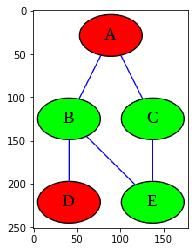

In [ ]:
import pydotplus as ptp
import matplotlib.pyplot as plt


graph = ptp.Dot(graph_type = 'graph')
edges = [(1,2), (1,3), (2,4), (2,5), (3,5)]
nodes = [(1, "A", "red"), (2, "B", "green"), (3, "C", "green"), (4, "D", "red"), (5, "E", "green")]


for e in edges:
    graph.add_edge(ptp.Edge(e[0], e[1], color="blue"))

for n in nodes:
    node = ptp.Node(name=n[0], label= n[1], fillcolor=n[2], style="filled" )
    graph.add_node(node)

graph.write_png("file.png")
plt.imshow(plt.imread("file.png"))

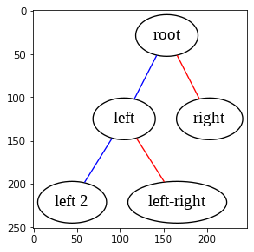

In [ ]:
class Node(object):
    def __init__(self):
        self.left = None
        self.right = None
        self.data = None

root = Node()
root.data = "root"
root.left = Node()
root.left.data = "left"
root.right = Node()
root.right.data = "right"

root.left.left = Node()
root.left.left.data = "left 2"
root.left.right = Node()
root.left.right.data = "left-right"

def visualize_tree(tree_root):
  temp_list = [tree_root]
  idx = 0

  while idx != len(temp_list):
    node_left = temp_list[idx].left
    node_right = temp_list[idx].right

    if node_left and (not node_left in temp_list):
      temp_list.append(node_left)
    if node_right and (not node_right in temp_list):
      temp_list.append(node_right)

    idx += 1

  graph = ptp.Dot(graph_type = 'graph')
  for i,n in enumerate(temp_list):
    node = ptp.Node(name=str(i), label=str(n.data))
    graph.add_node(node)
    if n.left:
      j = temp_list.index(n.left)
      graph.add_edge(ptp.Edge(str(i), str(j), color="blue"))
    if n.right:
      j = temp_list.index(n.right)
      graph.add_edge(ptp.Edge(str(i), str(j), color="red"))

  
  graph.write_png("file.png")
  plt.imshow(plt.imread("file.png"))

visualize_tree(root)

#Mathematics

In [ ]:
#@title #Bias-Variance tradeoff

%%html
<script src='https://www.gstatic.com/external_hosted/mathjax/latest/MathJax.js?config=default'></script>

<div id="all_slides">

<div>
Suppose, our data is generated by some process \(y(x)\) that has a functional part \(f(x)\) and a random part \(\varepsilon\).
Without loss of generality we may suppose that probability distribution function of \(\varepsilon\) is centered at zero.
Thus we have
$$
    y(x) = f(x) + \varepsilon.
$$
We want to create a model function \(\hat{f}(x)\) that is as close as possible to \(y(x)\).
As a measure of "closeness" we use expectation of squared error, i.e. \(\mathbb{E}[(y(x) - \hat{f}(x))^2]\),

What we will prove is
$$
\mathbb{E}[(y(x) - \hat{f}(x))^2] = 
    \underbrace{(f(x) - \mathbb{E}[\hat{f}(x)])^2}_{\mathbb{B}ias^2[\hat{f}]} +
    \underbrace{\mathbb{E}^2[\varepsilon]}_{\mathbb{V}ar[\varepsilon]} +
    \underbrace{\mathbb{E}[(\mathbb{E}[\hat{f}(x)] - \hat{f}(x))^2]}_{\mathbb{V}ar[\hat{f}]}
$$

<b>Self-assessment:</b>
do you undestand, what we are going to prove?
<table class="question_style">
<tr><td class="ok">Yes</td></tr>
<tr><td>No</td></tr>
</table>
</div>

<div>
First, we use the definition of \(y(x)\) from the previous slide
$$
\mathbb{E}[(y(x) - \hat{f}(x))^2] = 
\mathbb{E}[(f(x) + \varepsilon - \hat{f}(x))^2]
$$
<b>Self-assessment:</b>
do you undestand this step of the proof?
<table class="question_style">
<tr><td class="ok">Yes</td></tr>
<tr><td>No</td></tr>
</table>
</div>

<div>
We expand sum of squares
$$
\begin{aligned}
\mathbb{E}[(y(x) - \hat{f}(x))^2] &= 
\mathbb{E}[(f(x) + \varepsilon - \hat{f}(x))^2] = \\ &=
\mathbb{E}[(f(x) - \hat{f}(x))^2 + 2\varepsilon(f(x) - \hat{f}(x)) + \varepsilon^2]
\end{aligned}
$$
<b>Self-assessment:</b>
do you undestand this step of the proof?
<table class="question_style">
<tr><td class="ok">Yes</td></tr>
<tr><td>No</td></tr>
</table>
</div>

<div>
We use the property \(\mathbb{E}[X + Y] = \mathbb{E}[X] +\mathbb{E}[Y]\)
$$
\begin{aligned}
\mathbb{E}[(y(x) - \hat{f}(x))^2] &= 
\mathbb{E}[(f(x) - \hat{f}(x))^2 + 2\varepsilon(f(x) - \hat{f}(x)) + \varepsilon^2] = \\ &=
\mathbb{E}[(f(x) - \hat{f}(x))^2] + \mathbb{E}[2\varepsilon(f(x) - \hat{f}(x))] + \mathbb{E}[\varepsilon^2]
\end{aligned}
$$
<b>Self-assessment:</b>
do you undestand this step of the proof?
<table class="question_style">
<tr><td class="ok">Yes</td></tr>
<tr><td>No</td></tr>
</table>
</div>

<div>
We use independence of \(\varepsilon\), \(f\), and \(\hat{f}\).
Recall for <b>independent</b> random variables \(X\) and \(Y\) we know that \(\mathbb{E}[XY] = \mathbb{E}[X]\mathbb{E}[Y]\)
$$
\begin{aligned}
\mathbb{E}[(y(x) - \hat{f}(x))^2] &= 
\mathbb{E}[(f(x) - \hat{f}(x))^2] + \mathbb{E}[2\varepsilon(f(x) - \hat{f}(x))] + \mathbb{E}[\varepsilon^2] = \\ &=
\mathbb{E}[(f(x) - \hat{f}(x))^2] + \underbrace{\mathbb{E}[\varepsilon]}_{= 0}\mathbb{E}[2(f(x) - \hat{f}(x))] + \mathbb{E}[\varepsilon^2]
\end{aligned}
$$
<b>Self-assessment:</b>
do you undestand this step of the proof?
<table class="question_style">
<tr><td class="ok">Yes</td></tr>
<tr><td>No</td></tr>
</table>
</div>

<div>
Now we are half-way there
$$
\begin{aligned}
\mathbb{E}[(y(x) - \hat{f}(x))^2] &= 
\mathbb{E}[(f(x) - \hat{f}(x))^2] + \mathbb{E}[\varepsilon^2]
\end{aligned}
$$
Quantity \(\mathbb{E}[\varepsilon^2]\) is caused by unavoidable error.
<br>
<b>Self-assessment:</b>
do you undestand this step of the proof?
<table class="question_style">
<tr><td class="ok">Yes</td></tr>
<tr><td>No</td></tr>
</table>
</div>

<div>
We expand square of sum
$$
\begin{aligned}
\mathbb{E}[(y(x) - \hat{f}(x))^2] &= 
\mathbb{E}[(f(x) - \hat{f}(x))^2] + \mathbb{E}[\varepsilon^2] = \\ &=
\mathbb{E}[f^2(x) - 2 f(x) \hat{f}(x) + \hat{f}^2(x)] + \mathbb{E}[\varepsilon^2]
\end{aligned}
$$
<b>Self-assessment:</b>
do you undestand this step of the proof?
<table class="question_style">
<tr><td class="ok">Yes</td></tr>
<tr><td>No</td></tr>
</table>
</div>

<div>
We use the property \(\mathbb{E}[X + Y] = \mathbb{E}[X] +\mathbb{E}[Y]\)
$$
\begin{aligned}
\mathbb{E}[(y(x) - \hat{f}(x))^2] &= 
\mathbb{E}[f^2(x) - 2 f(x) \hat{f}(x) + \hat{f}^2(x)] + \mathbb{E}[\varepsilon^2] = \\ &=
\mathbb{E}[f^2(x)] - \mathbb{E}[2 f(x) \hat{f}(x)] + \mathbb{E}[\hat{f}^2(x)] + \mathbb{E}[\varepsilon^2]
\end{aligned}
$$
<b>Self-assessment:</b>
do you undestand this step of the proof?
<table class="question_style">
<tr><td class="ok">Yes</td></tr>
<tr><td>No</td></tr>
</table>
</div>

<div>
We use that \(f\) is deterministic
$$
\begin{aligned}
\mathbb{E}[(y(x) - \hat{f}(x))^2] &= 
\mathbb{E}[f^2(x)] - \mathbb{E}[2 f(x) \hat{f}(x)] + \mathbb{E}[\hat{f}^2(x)] + \mathbb{E}[\varepsilon^2] = \\ &=
f^2(x) - 2f(x)\mathbb{E}[\hat{f}(x)] + \mathbb{E}[\hat{f}^2(x)] + \mathbb{E}[\varepsilon^2]
\end{aligned}
$$
<b>Self-assessment:</b>
do you undestand this step of the proof?
<table class="question_style">
<tr><td class="ok">Yes</td></tr>
<tr><td>No</td></tr>
</table>
</div>

<div>
Add and subtract the same quantity
$$
\begin{aligned}
\mathbb{E}[(y(x) - \hat{f}(x))^2] &= 
f^2(x) - 2f(x)\mathbb{E}[\hat{f}(x)] + \mathbb{E}[\hat{f}^2(x)] + \mathbb{E}[\varepsilon^2] = \\ &=
f^2(x) - 2f(x)\mathbb{E}[\hat{f}(x)] + \underbrace{\mathbb{E}^2[\hat{f}(x)] - \mathbb{E}^2[\hat{f}(x)]}_{= 0} + \mathbb{E}[\hat{f}^2(x)] + \mathbb{E}[\varepsilon^2]
\end{aligned}
$$
<b>Self-assessment:</b>
do you undestand this step of the proof?
<table class="question_style">
<tr><td class="ok">Yes</td></tr>
<tr><td>No</td></tr>
</table>
</div>

<div>
And collect everything
$$
\begin{aligned}
\mathbb{E}[(y(x) - \hat{f}(x))^2] &= 
f^2(x) - 2f(x)\mathbb{E}[\hat{f}(x)] + \mathbb{E}^2[\hat{f}(x)] - \mathbb{E}^2[\hat{f}(x)] + \mathbb{E}[\hat{f}^2(x)] + \mathbb{E}[\varepsilon^2] = \\ &=
(f(x) - \mathbb{E}[\hat{f}(x)])^2 + (\mathbb{E}[\hat{f}^2(x)] - \mathbb{E}^2[\hat{f}(x)]) + \mathbb{E}[\varepsilon^2]
\end{aligned}
$$
<b>Self-assessment:</b>
do you undestand this step of the proof?
<table class="question_style">
<tr><td class="ok">Yes</td></tr>
<tr><td>No</td></tr>
</table>
</div>

<div>
That is exactly the result we aimed
$$
\mathbb{E}[(y(x) - \hat{f}(x))^2] = 
    \underbrace{(f(x) - \mathbb{E}[\hat{f}(x)])^2}_{\mathbb{B}ias^2[\hat{f}]} +
    \underbrace{\mathbb{E}^2[\varepsilon]}_{\mathbb{V}ar[\varepsilon]} +
    \underbrace{\mathbb{E}[(\mathbb{E}[\hat{f}(x)] - \hat{f}(x))^2]}_{\mathbb{V}ar[\hat{f}]}
$$
<b>QED</b>
<br>
<b>Self-assessment:</b>
do you undestand the proof?
<table class="question_style">
<tr><td class="ok">Yes</td></tr>
<tr><td>No</td></tr>
</table>
</div>


</div>

<div style="position:absolute; top:30px; left:900px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
//var slides = ["slide_1", "slide_2", "slide_3"];

var container = document.getElementById("all_slides");
var menu_conn = document.createElement("div");
menu_conn.style.height = "90px";
menu_conn.id = "menu_div";
container.prepend(menu_conn);

// crutches
var slides = [];
var tmp = container.getElementsByTagName("div");
for (var i = 0; i < tmp.length; ++i)
  if (!tmp[i].id || tmp[i].id != "menu_div")
  {
    tmp[i].classList.add('slide_style');
    slides.push(tmp[i]);
  }


var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;
var menu = [];

function change_slide_to(new_slide_idx)
{
  menu[current_slide].style.borderWidth = "0px";
  var old_slide = slides[current_slide]; //document.getElementById(slides[current_slide]);
  current_slide = new_slide_idx;
  menu[current_slide].style.borderWidth = "2px";
  var new_slide = slides[current_slide]; //document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_left()
{
  var new_idx = current_slide - 1;
  if (new_idx < 0) {new_idx = 0;}
  change_slide_to(new_idx);
}

function slide_right()
{
  var new_idx = current_slide + 1;
  if (new_idx >= slides.length) {new_idx = slides.length - 1;}
  change_slide_to(new_idx);
}

function change(obj, is_correct)
{
//   alert(obj.parentNode.rowIndex);
    var rowId = obj.parentNode.rowIndex;
    var table = obj.parentNode.parentNode.parentNode;
    var rowsNotSelected = table.getElementsByTagName('tr');
    for (var row = 0; row < rowsNotSelected.length; row++)
    {
        rowsNotSelected[row].cells[0].style.backgroundColor = "white";
    }
    var rowSelected = table.getElementsByTagName('tr')[rowId];
    if (is_correct > 0)
    {
        rowSelected.cells[0].style.backgroundColor = "#66bb6aa9";
        menu[current_slide].style.backgroundColor = "#66bb6aa9";
    }
    else
    {
        rowSelected.cells[0].style.backgroundColor = "#ff3a3981";
        menu[current_slide].style.backgroundColor = "#ff3a3981";
    }
}

function make_callback(obj, is_correct)
{
  return function() { change(obj, is_correct); }
}

function change_callback(new_idx)
{
  return function() { change_slide_to(new_idx); }
}

document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
slides[current_slide].style.display='block'; //document.getElementById(slides[current_slide]).style.display='block';

// create upper menu
upper_menu = document.getElementById("menu_div");

var tbl      = document.createElement("table");
var tbl_body = document.createElement("tbody");
var tbl_row  = document.createElement("tr");
for (idx = 0; idx < slides.length; idx++)
{
    var tbl_cell = document.createElement("td");
    var cell_text = document.createTextNode(idx+1);
    tbl_cell.appendChild(cell_text);
    tbl_cell.onclick = change_callback(idx);
    tbl_row.appendChild(tbl_cell);
    menu.push(tbl_cell);
    tbl_cell.style.borderWidth = "0px";

    var slide = slides[idx]; //document.getElementById(slides[idx]);
    var all_tables = slide.getElementsByTagName("table");
    for (t_i = 0; t_i < all_tables.length; t_i++)
    {
      var table = all_tables[t_i];
      if (!table.classList.contains("question_style"))
        continue;
      var rows = table.getElementsByTagName('tr');
      for (r_i = 0; r_i < rows.length; r_i++)
      {
        var question_cell = rows[r_i].cells[0];
        question_cell.classList.add("highlight");
        if (question_cell.classList.contains("ok"))
        {
          question_cell.onclick = make_callback(question_cell, 1);
        } else {
          question_cell.onclick = make_callback(question_cell, 0);
        }
        

        var cell = rows[r_i].insertCell(0);
        cell.width = "50px";
      }
    }
}
tbl_body.appendChild(tbl_row);
tbl.appendChild(tbl_body);
upper_menu.appendChild(tbl);
tbl.classList.add('menu_style');
menu[current_slide].style.borderWidth = "2px";

</script>

<style>
    .slide_style {
      max-width:750px;
      display:none;
      font: 14pt/18pt sans-serif;
      position: static;
      top: 80px;
      left: 0px;
    }

    .question_style {
        width:600px;
        font: 16pt/14pt sans-serif bold;
        text-align:left;
        cursor: default;
    }
    .question_style td{ 
        padding:7px;
        height: 50px;
        border:#4e95f4 0px solid;
        text-align:left;
        font: 13pt/16pt sans-serif;
    }
    .highlight:hover{
        background-color: #00000019
    }
    .menu_style {
        height:50px;
        font: 16pt/14pt sans-serif bold;
        text-align:left;
        cursor: default;
    }    
    .menu_style td{ 
        width:50px;
        padding:7px;
        border:#787878ff solid;
        text-align:center;
        font: 16pt/14pt sans-serif;
        color: #606060ff;
    }
</style>


#Bounce Balls

In [ ]:
# @ title #Black magic (just run it to get few helper functions)

from IPython.core.magic import  Magics, magics_class, cell_magic, line_magic

@magics_class
class Helper(Magics):

  def __init__(self, shell=None,  **kwargs):
    super().__init__(shell=shell, **kwargs)

  @cell_magic
  def embed_into_game(self, line, cell):
    games = {'ball': self._bouncing_ball}
    games[line](cell)

  def _bouncing_ball(self, python_code):
    str_begin = '''
<script type="text/javascript" src="https://brython.info/src/brython.js"></script>
<script type="text/javascript" src="https://brython.info/src/brython_stdlib.js"></script>
<script type="text/python3">
    '''
    str_end = '''
from browser import document, svg, timer

panel = document['panel']

## hacking the ball class
old_f1 = Ball.move_and_view
def draw_ball(ball, *args, **kwargs):
  old_f1(ball, *args, **kwargs)
  x, y = ball.get_coordinates()
  r_ball, color = ball.get_properties()
  ball = svg.circle(cx=x, cy=total_h-y, r=r_ball, stroke="black", stroke_width="2", fill=color)
  panel <= ball
Ball.move_and_view = draw_ball

## hacking the block class
old_f2 = Block.move_and_view
def draw_block(block, *args, **kwargs):
  old_f2(block, *args, **kwargs)
  X, Y = block.get_corners()
  color = block.get_properties()
  block = svg.rect(x=X[0], y=total_h-Y[1], width=X[1]-X[0], height=Y[1]-Y[0], stroke_width="2", fill=color)
  panel <= block
Block.move_and_view = draw_block





key_status = {188: False, 190: False, 90: False, 88: False}
send_back_key = [0, 0]

def key_down(ev):
  ev.stopPropagation()
  directions_up   = {188: -1, 190: 1}
  directions_down = { 90: -1,  88: 1}
  if ev.keyCode in directions_up:
    send_back_key[0] = directions_up[ev.keyCode]
  if ev.keyCode in directions_down:
    send_back_key[1] = directions_down[ev.keyCode]
  if ev.keyCode in key_status.keys():
    key_status[ev.keyCode] = True
  if ev.keyCode == 13:
    pass  
  
def key_up(ev):
  ev.stopPropagation()
  directions_up   = [188, 190]
  directions_down = [90,  88]
  if ev.keyCode in key_status.keys():
    key_status[ev.keyCode] = False
  if not key_status[directions_up[0]] and not key_status[directions_up[1]]:
    send_back_key[0] = 0
  if not key_status[directions_down[0]] and not key_status[directions_down[1]]:
    send_back_key[1] = 0


def keyCode(ev):
  ev.stopPropagation()
  wait_for_key_and_start()
  
document.onkeydown = key_down #keyCode
document.onkeyup = key_up

def evolute():
  panel.clear()
  timer_tick(send_back_key[1], send_back_key[0])
    
loop = timer.set_interval(evolute, 3)

</script>

<div id="errors" style="position:absolute; max-width:400px;"></div>

<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" 
    width="1000" height="600" style="border-style:solid;border-width:1;border-color:#000;">
  <g id="panel">
  </g>
</svg>

<script>
console.log = text =>
{
    var highestTimeoutId = setTimeout(";");
    for (var i = 0 ; i < highestTimeoutId ; i++) {
        clearTimeout(i); 
    }
    let element = document.getElementById("errors");
    element.innerHTML += text.replace('\\n', '<br>') + '<br>';
}
brython(1)
</script>    '''
    import IPython
    from google.colab import output
    display(IPython.display.HTML(str_begin + python_code + str_end))

## use ipython load_ext mechanism here if distributed
get_ipython().register_magics(Helper)
from IPython.display import clear_output
clear_output()

In [ ]:
%%embed_into_game ball

total_w = 1000
total_h = 600

class Vector2D:
  def __init__(self, x=0, y=0): self.x, self.y = x, y
  def __add__(self, other): return Vector2D(self.x + other.x, self.y + other.y)
  def __sub__(self, other): return Vector2D(self.x - other.x, self.y - other.y)
  def __mul__(self, num): return Vector2D(self.x * num, self.y * num)
  def __rmul__(self, other): return self.__mul__(other)
  def dot(self, other): return self.x * other.x + self.y * other.y
  def cross(self, other): return self.x * other.y - self.y * other.x
  def lng(self): return sqrt(self.x**2 + self.y**2)
  def ccw(self, other_1, other_2): return (other_1 - self).cross(other_2 - self) > 0

class Ball:
  def __init__(self, r, color, p, v, g):
    self.r = r
    self.color = color
    self.restart(p, v, g)

  def restart(self, p, v, g):
    self.p = p
    self.v = v
    self.g = g

  # do not change the signature of this methods
  # it is needed for correct drawing
  def get_coordinates(self): return self.p.x, self.p.y
  def get_properties(self): return self.r, self.color

  def predict(self): return self.p + self.v

  def move_and_view(self):
    self.p = self.predict()
    self.v.y -= self.g

  def collide(self, v, u, vel):
    p1, p2 = self.p, self.predict()
    if not p1.ccw(u, v) and p2.ccw(v, u):
      if (v - u).x == 0:
        self.v.x = -self.v.x
      else:
        self.v.y = -self.v.y
      return True
    return False


def clamp(x, x_min, x_max):
  if x < x_min: return x_min
  if x > x_max: return x_max
  return x

class Block:
  def __init__(self, p, size, color, v=0.0):
    self.p = p
    self.size = size
    self.color = color
    self.v = v

  def move_and_view(self, direction):
    self.p = [self.p[0] + self.v * direction[0], self.p[1] + self.v * direction[1]]
    self.p = [clamp(self.p[0], 0, total_w - self.size[0]), clamp(self.p[1], 0, total_h - self.size[1])]
    return self.p[1] > 0

  def get_corners(self):
    return [self.p[0], self.p[0] + self.size[0]], [self.p[1], self.p[1] + self.size[1]]
  def get_velocity(self):
    return self.v
  def get_properties(self): return self.color


def collide_ball_rectangle(ball, X, Y, V):
  return (ball.collide(Vector2D(X[0], Y[0]), Vector2D(X[0], Y[1]), V) or
          ball.collide(Vector2D(X[0], Y[0]), Vector2D(X[1], Y[0]), V) or
          ball.collide(Vector2D(X[1], Y[0]), Vector2D(X[1], Y[1]), V) or
          ball.collide(Vector2D(X[0], Y[1]), Vector2D(X[1], Y[1]), V) )

def collide_ball_block(ball, block, direction):
  v = Vector2D(block.get_velocity()*direction[0], block.get_velocity()*direction[1])
  collide_ball_rectangle(ball, *block.get_corners(), v)

ball1 = Ball(10, 'red', Vector2D(20, 20), Vector2D(.8, 4.), 0.02)
ball2 = Ball(10, 'green', Vector2D(60, 30), Vector2D(.8, 1.2), 0.01)

blk = Block([100, 100], [300, 100], "blue", v=1.0)

# This function will be called on timer
# It should perform one step of evolution 
# Update positon ob the ball here
def timer_tick(key_left, key_right):
  collide_ball_rectangle(ball1, [0, total_w], [0, total_h], Vector2D(0, 0))
  collide_ball_rectangle(ball2, [0, total_w], [0, total_h], Vector2D(0, 0))
  collide_ball_block(ball1, blk, [key_left, key_right])
  collide_ball_block(ball2, blk, [key_left, key_right])
  ball1.move_and_view()
  ball2.move_and_view()
  blk.move_and_view([key_left, key_right])

# This function waits for keypress and than performs some job
# Do all inits here
def wait_for_key_and_start():
  ball1.restart([20, 20], [2, 10], 0.2)